The dataset for this project has been downloaded from Kaggle at URL : https://www.kaggle.com/joniarroba/noshowappointments

onto my local machine. It has been unzipped and loaded into this notebook as a Pandas dataframe


---



In [ ]:
# importing the basic libraries
import pandas as pd
import numpy as np

In [12]:
#loading the dataset into a dataframe
df = pd.read_csv('KaggleV2-May-2016.csv')

In [13]:
# shape and basic information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [14]:
# displaying first 10 rows of the dataset
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [15]:
# checking the basic min-max values and other stats of the dataset as-is
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**1. Data preparation and data cleaning**

---



In [16]:
# checking if duplicate rows exist in the dataset
df.duplicated().sum()

0



> We see there is scope of sanitizing the column names as names like No-Show seperated by hyphen creates issues in working such columns and also making the column names in lowercase would make it easier to use the names.



In [17]:
# Make column values uniform in categorical columns
df.columns = df.columns.str.lower().str.replace('-', '_')

In [18]:
# the sanitized columns names now
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')



>  We see that the patientid is an identifier and hence its data should not be float data type. So we change it to int



In [19]:
# changing the appointmentid
df['patientid'] = df['patientid'].astype(int)

In [20]:
# verifying
df['patientid'].dtype

dtype('int64')


>  We observe that the **scheduledday** column and the **appointmentday** column columns need to be converted from object datatype to proper datetime datatype for any processing to be done on them.


In [21]:
# Convert to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
# Convert to datetime
df['appointmentday'] = pd.to_datetime(df['appointmentday'])



> We need to encode the target feature **no_show** as Yes (Absent/No show) = 1 and No (Attended/show) = 0



In [22]:
# encoding the target column
df.no_show = (df.no_show == 'Yes').astype(int)

In [23]:
# infortmation on the  dataset cleaned till now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  int64              
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       


**2. Exploratory Data Analysis with feature importance analysis accompanied by a few fearture engineering**

---







> We have already seen no missing values or duplicated rows existing in the original dataset. We shall now have a look at the **range of values** in this full  dataset



In [24]:
# checking stats on the full  dataset
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


> We can infer

> * The dates for scheduling the appointments starts from
  2015-11-10 to 2016-06-08, spreading over 7 months
* However, the appointments are spread just over a month staring from 2016-04-29 to 2016-06-08
* The maximum age of patient(s) is 115 years and mimimum are -1 years (anomaly)
* No show/ Absent rate is 20% of the scheduled appointments
* Even though scholarship, hipertension, diabetes & sms_received are int64 by data type, their values are more on the catergorical context with 0 & 1 as min-max values.

> The Standard Deviation for the date columns are coming NaN probably because the values represent timestamps rather than scalar quantities and pandas might not natively calculate standard deviation for timestamps






> Target variable (no_show) Analysis



In [25]:
# absolute count
df.no_show.value_counts()

,count
no_show,
0,88208
1,22319


In [26]:
# percentage
round(df.no_show.value_counts(normalize=True), 2)*100

,proportion
no_show,
0,80.0
1,20.0


In [27]:
# loading tthe visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

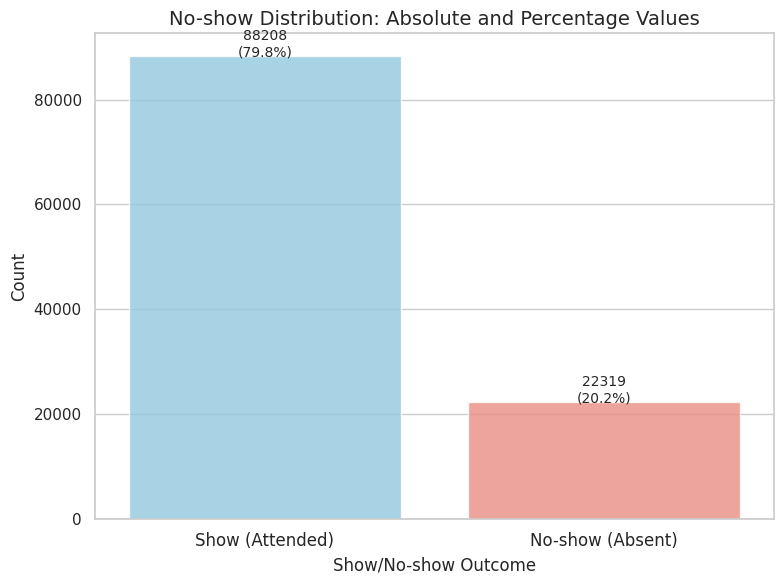

In [28]:
# visualizing the target feature
sns.set(style="whitegrid")
# Get the absolute and percentage values
counts = df['no_show'].value_counts()
percentages = df['no_show'].value_counts(normalize=True) * 100

# Define labels for the bars
labels = ['Show (Attended)', 'No-show (Absent)']  # 0 -> Show, 1 -> No-show

# Create a new dataframe to facilitate hue usage
df_plot = pd.DataFrame({
    'Outcome': counts.index,
    'Count': counts.values,
    'Percentage': percentages.values
})

# Create the bar plot with hue (using 'Outcome' as the hue)
fig, ax = plt.subplots(figsize=(8, 6))
bars = sns.barplot(x='Outcome', y='Count', data=df_plot, hue='Outcome', palette=['skyblue', 'salmon'], alpha=0.8, legend=False, ax=ax)

# Annotate each bar with absolute and percentage values
for i, (bar, abs_val, perc) in enumerate(zip(bars.patches, counts.values, percentages)):
    # Get the position for annotation: the x and y location of each bar
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
            f'{abs_val}\n({perc:.1f}%)', ha='center', fontsize=10)

# Set axis labels and title
ax.set_title('No-show Distribution: Absolute and Percentage Values', fontsize=14)
ax.set_xlabel('Show/No-show Outcome', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Set x-axis ticks and labels
ax.set_xticks([0, 1])
ax.set_xticklabels(labels, fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

> Checking the categorial columns for unique values and value counts

In [29]:
# checking the unique values and value counts for the categorical column
for col in list(df.dtypes[df.dtypes == 'object'].index):
    print("Unique values for ", col, " is ", df[col].nunique())
    print(df[col].value_counts())
    print("\n")

Unique values for  gender  is  2
gender
F    71840
M    38687
Name: count, dtype: int64


Unique values for  neighbourhood  is  81
neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64






> Analyze **Feature Importance** of the Categorical Features (*primarily following what was taught in the classes*)





> Risk Ratio



In [30]:
from IPython.display import display

gender


,mean,count,diff,risk_ratio_tend_to_No_Show
gender,,,,
F,0.203146,71840,0.001213,1.006009
M,0.199679,38687,-0.002253,0.988842


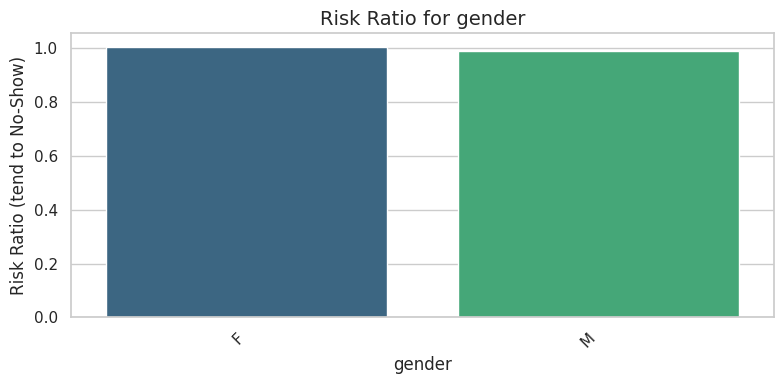

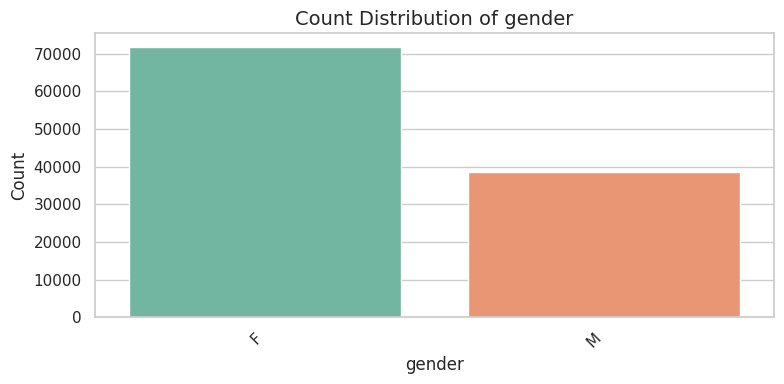

neighbourhood


,mean,count,diff,risk_ratio_tend_to_No_Show
neighbourhood,,,,
AEROPORTO,0.125000,8,-0.076933,0.619019
ANDORINHAS,0.230327,2262,0.028395,1.140614
ANTÔNIO HONÓRIO,0.184502,271,-0.017431,0.913681
ARIOVALDO FAVALESSA,0.219858,282,0.017926,1.088770
BARRO VERMELHO,0.215130,423,0.013197,1.065356
...,...,...,...,...
SÃO JOSÉ,0.216490,1977,0.014557,1.072089
SÃO PEDRO,0.210376,2448,0.008443,1.041812
TABUAZEIRO,0.182950,3132,-0.018982,0.905996


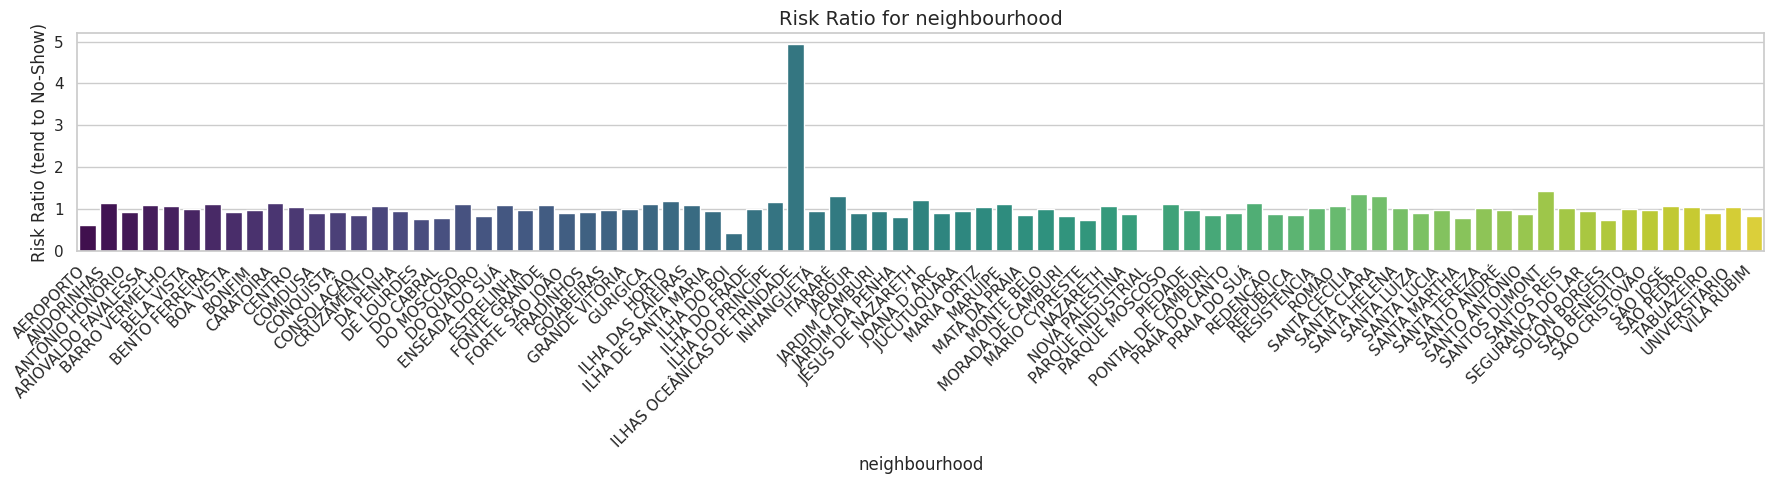

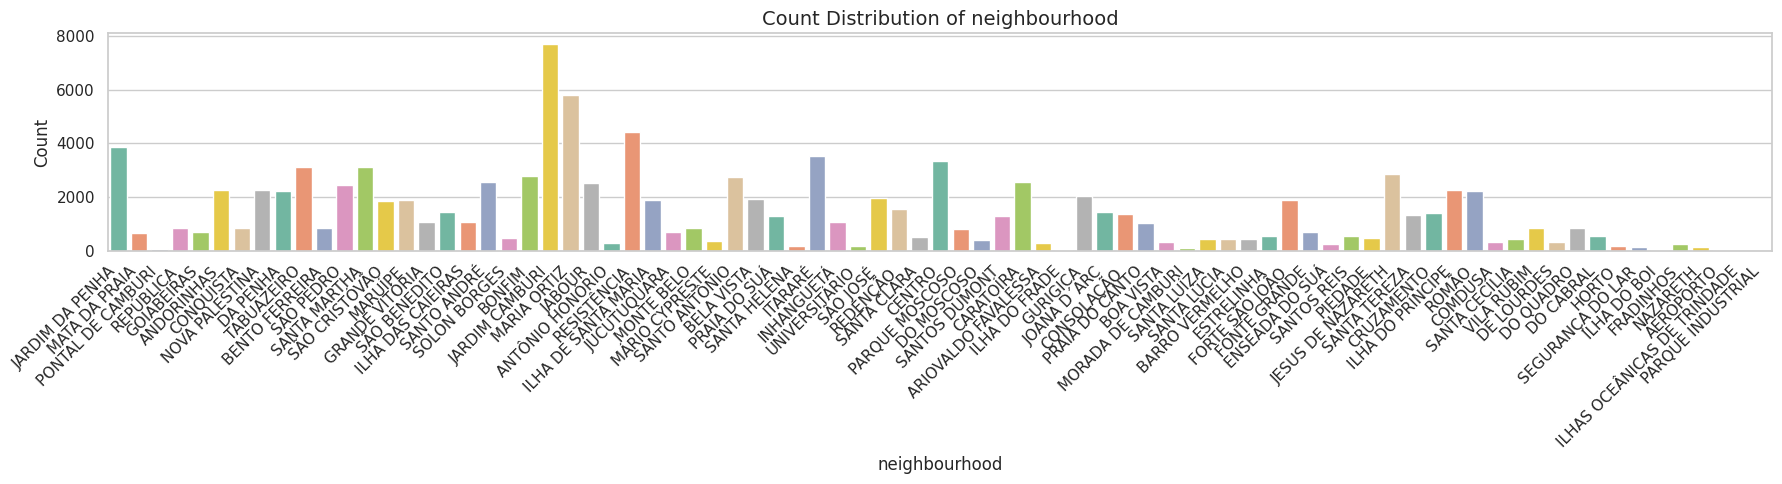

In [31]:
# risk ratio for the categorical columns
global_no_show = df.no_show.mean()
cntr=0
sns.set(style="whitegrid")
for col in list(df.dtypes[df.dtypes == 'object'].index):
    print(col)
    df_group = df.groupby(col).no_show.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_no_show
    df_group['risk_ratio_tend_to_No_Show'] = df_group['mean'] / global_no_show
    display(df_group)
    print()



    # visualization for the bar plot
    if(cntr>0):
      plt.figure(figsize=(18, 5))
    else:
      plt.figure(figsize=(8, 4))

    sns.barplot(
    x=df_group.index,
    y=df_group['risk_ratio_tend_to_No_Show'],
    palette='viridis',
    hue=df_group.index  # Explicitly assign x-variable to hue
    )
    plt.title(f'Risk Ratio for {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Risk Ratio (tend to No-Show)', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

    plt.tight_layout()
    plt.show()



    # visualization for the Count Plot
    if(cntr>0):
      plt.figure(figsize=(18, 5))
    else:
      plt.figure(figsize=(8, 4))

    sns.countplot(
    data=df,
    x=col,
    palette='Set2',
    hue=col,  # Explicitly assign x-variable to hue
    dodge=False  # Prevent splitting bars for the same category
    )
    plt.title(f'Count Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

    plt.tight_layout()
    plt.show()
    cntr+=1

In [32]:
df.patientid.nunique(), df.neighbourhood.nunique()

(62299, 81)



> So we observe the data was collected from 62299 patients from 81 neighbrhoods





> As stated earlier, I am now checking the numerical columns that exhibit context of catergorical data


In [33]:
for col in list(df.dtypes[df.dtypes == 'int64'].index):
  if(col not in ['patientid', 'appointmentid', 'age', 'no_show']): # identifiers, continuous variables & target variables are excluded
    print("Column ", col, " has ", df[col].nunique(), " unique values")
    display(round(df[col].value_counts(normalize=True),3)*100)
    print()

Column  scholarship  has  2  unique values


,proportion
scholarship,
0,90.2
1,9.8



Column  hipertension  has  2  unique values


,proportion
hipertension,
0,80.3
1,19.7



Column  diabetes  has  2  unique values


,proportion
diabetes,
0,92.8
1,7.2



Column  alcoholism  has  2  unique values


,proportion
alcoholism,
0,97.0
1,3.0



Column  handcap  has  5  unique values


,proportion
handcap,
0,98.0
1,1.8
2,0.2
3,0.0
4,0.0



Column  sms_received  has  2  unique values


,proportion
sms_received,
0,67.9
1,32.1




> We observe here that the **handcap** feature has values 0 to 4, probably citing the severity of handicap a person has. However, the data dictionary under the Data Card in the Kaggle page for the dataset mentions this column in the categoric context [boolean: True (1) or False(0)]. Also we observe, the severity categories 1, 2, 3, 4 even cummulatively only comprises 2% of the values set. Let us now see the count of no_show values corresponding to each category in the handcap column


In [34]:
# Group by 'handcap' and count 'no_show' values
handcap_no_show_counts = df.groupby('handcap')['no_show'].value_counts().unstack()

# Rename columns for clarity (e.g., 0 -> Show, 1 -> No-Show)
handcap_no_show_counts.columns = ['Show', 'No_Show']

#fix NaN
handcap_no_show_counts = handcap_no_show_counts.fillna(0)
handcap_no_show_counts['Show'] = handcap_no_show_counts['Show'].astype(int)
handcap_no_show_counts['No_Show'] = handcap_no_show_counts['No_Show'].astype(int)


# Display the result
handcap_no_show_counts

,Show,No_Show
handcap,,
0,86374,21912
1,1676,366
2,146,37
3,10,3
4,2,1


> So we will combine the categories 1,2,3 & 4 as 1 (True for being handicap)

In [35]:
df['handcap'] = np.where(df['handcap'].isin([1, 2, 3]), 1, 0)

In [36]:
# verifying
round(df.handcap.value_counts(normalize=True), 3)*100

,proportion
handcap,
0,98.0
1,2.0


> So getting back to evaluating the risk ratio for these features

scholarship


,mean,count,diff,risk_ratio_tend_to_No_Show
scholarship,,,,
0,0.198072,99666,-0.003861,0.980880
1,0.237363,10861,0.035430,1.175457


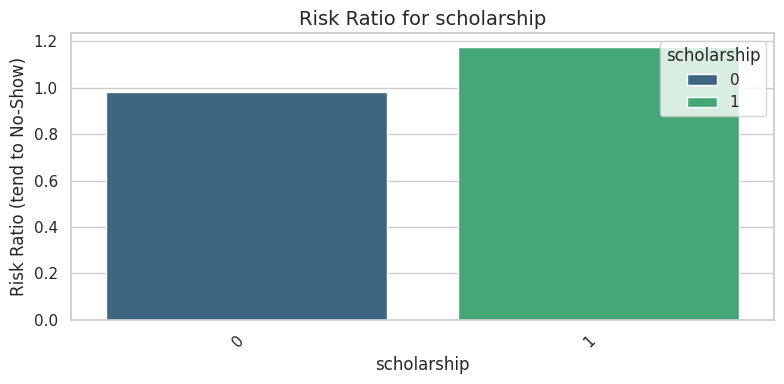

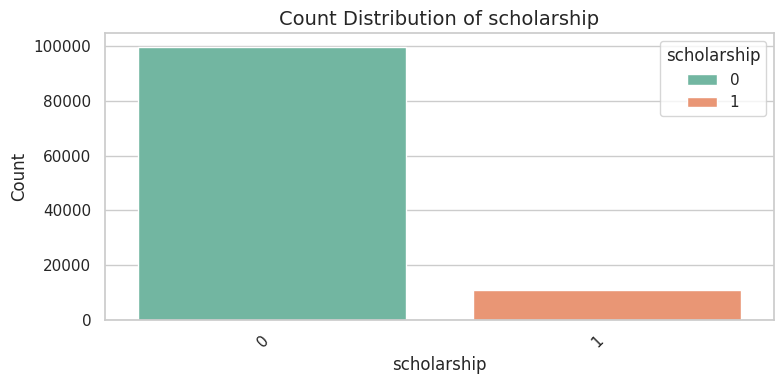

hipertension


,mean,count,diff,risk_ratio_tend_to_No_Show
hipertension,,,,
0,0.209037,88726,0.007104,1.035181
1,0.173020,21801,-0.028913,0.856819


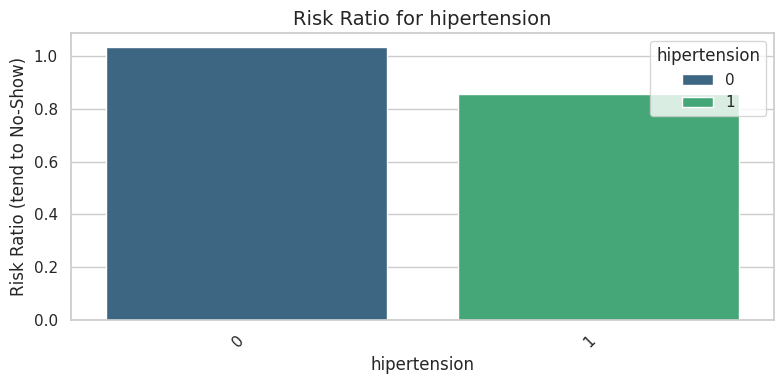

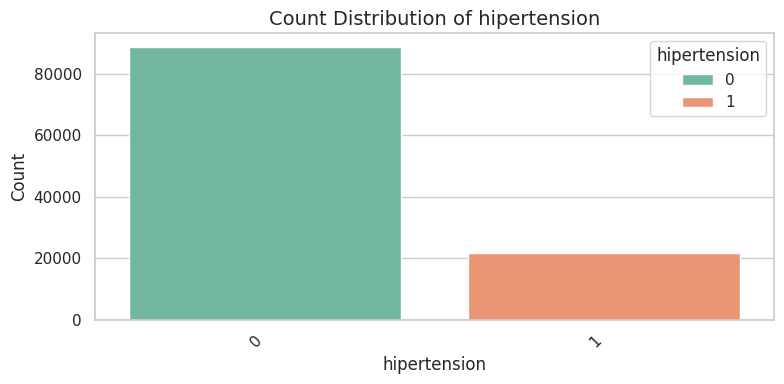

diabetes


,mean,count,diff,risk_ratio_tend_to_No_Show
diabetes,,,,
0,0.203628,102584,0.001696,1.008397
1,0.180033,7943,-0.021900,0.891549


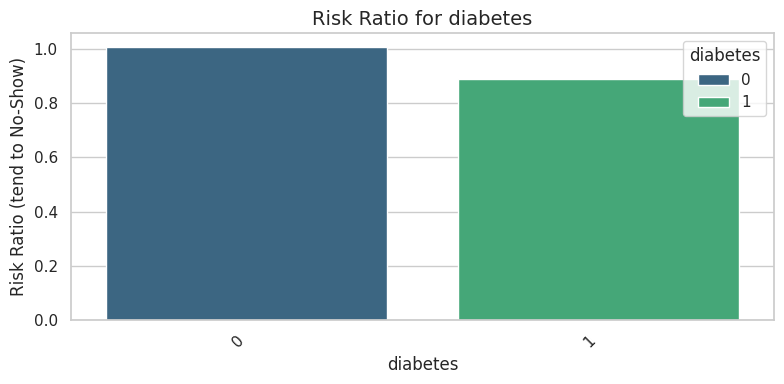

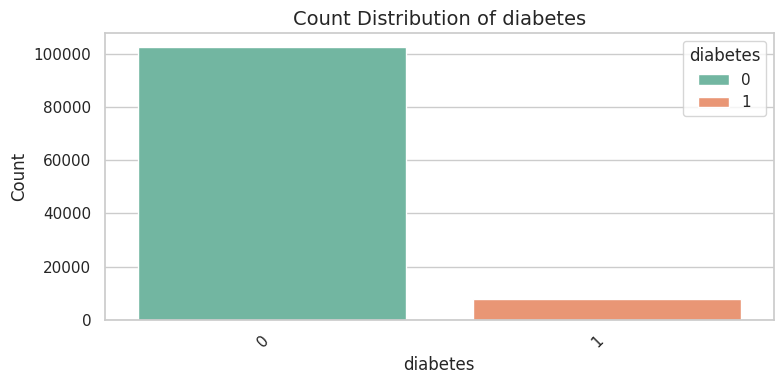

alcoholism


,mean,count,diff,risk_ratio_tend_to_No_Show
alcoholism,,,,
0,0.201946,107167,0.000014,1.000069
1,0.201488,3360,-0.000444,0.997799


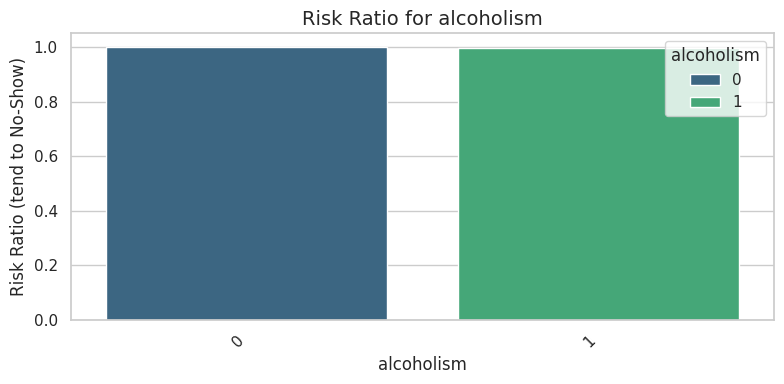

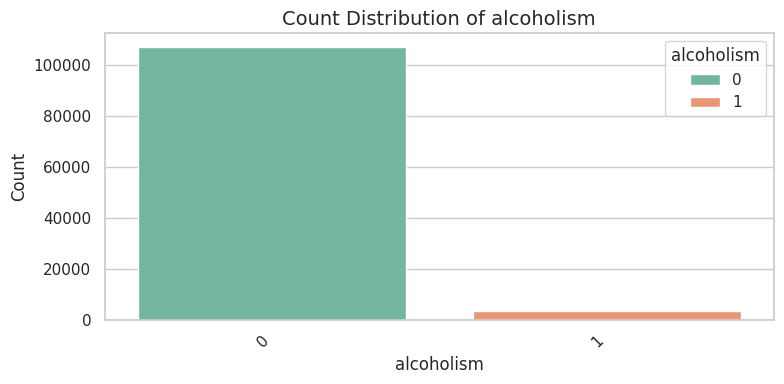

handcap


,mean,count,diff,risk_ratio_tend_to_No_Show
handcap,,,,
0,0.202357,108289,0.000424,1.002100
1,0.181412,2238,-0.020521,0.898379


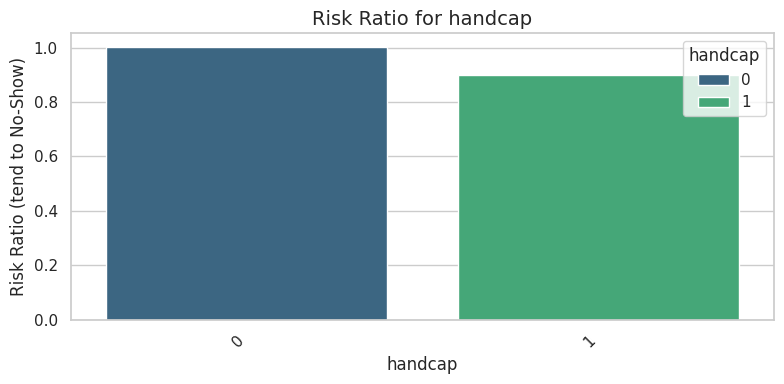

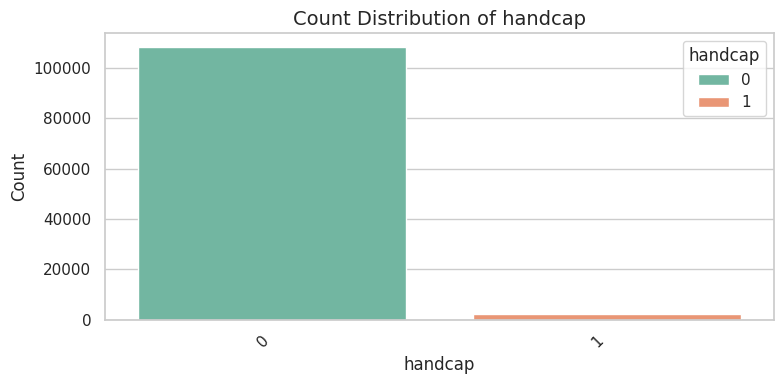

sms_received


,mean,count,diff,risk_ratio_tend_to_No_Show
sms_received,,,,
0,0.167033,75045,-0.034899,0.827173
1,0.275745,35482,0.073813,1.365532


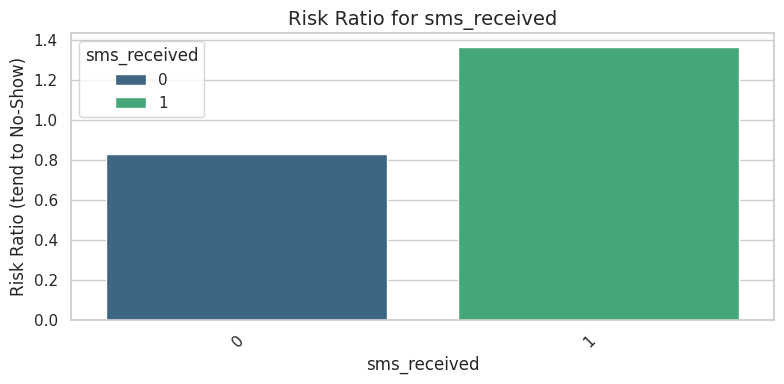

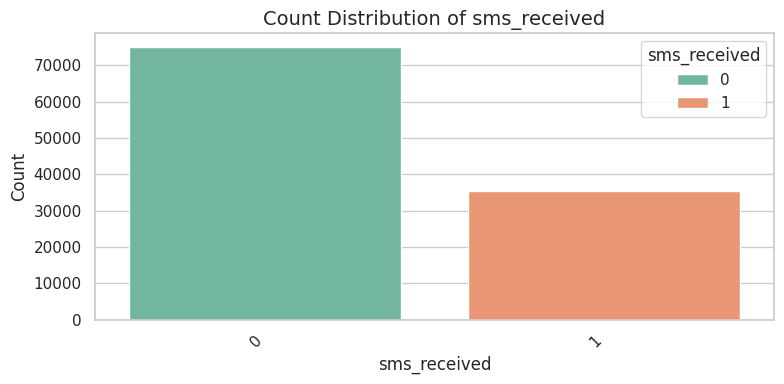

In [37]:
# risk ratio for the numerical but categorical-context columns

sns.set(style="whitegrid")
for col in list(df.dtypes[df.dtypes == 'int64'].index):
  if(col not in ['patientid', 'appointmentid', 'age', 'no_show']): # identifiers, continuous variables & target variables are excluded
    print(col)
    df_group = df.groupby(col).no_show.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_no_show
    df_group['risk_ratio_tend_to_No_Show'] = df_group['mean'] / global_no_show
    display(df_group)
    print()

    # visualization for the bar plot
    plt.figure(figsize=(8, 4))
    sns.barplot(
    x=df_group.index,
    y=df_group['risk_ratio_tend_to_No_Show'],
    palette='viridis',
    hue=df_group.index  # Explicitly assign x-variable to hue
    )
    plt.title(f'Risk Ratio for {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Risk Ratio (tend to No-Show)', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

    plt.tight_layout()
    plt.show()


    # visualization for the Count Plot
    plt.figure(figsize=(8, 4))
    sns.countplot(
    data=df,
    x=col,
    palette='Set2',
    hue=col,  # Explicitly assign x-variable to hue
    dodge=False  # Prevent splitting bars for the same category
    )
    plt.title(f'Count Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

    plt.tight_layout()
    plt.show()



> Now let us move our attention to the date columns viz. **scheduledday** and **appointmentday**. From these dates we can get the number of waiting days and also the day-of-week for both the dates. We can further split each date into its date and month part.




In [38]:
df['scheduledday_date'] = df['scheduledday'].dt.day
df['scheduledday_month'] = df['scheduledday'].dt.month
df['scheduledday_dow'] = df['scheduledday'].dt.dayofweek + 1 # Monday is should be identified as 1
df['scheduledday_hr'] = df['scheduledday'].dt.hour
df['appointmentday_date'] = df['appointmentday'].dt.day
df['appointmentday_month'] = df['appointmentday'].dt.month
df['appointmentday_dow'] = df['appointmentday'].dt.dayofweek + 1  # Monday is should be identified as 1

In [39]:
#convert the existing to datetime dtype without the timestamp
# Strip the time component but keep as datetime64[ns]
df['scheduledday'] = pd.to_datetime(df['scheduledday'], errors='coerce').dt.normalize()
df['appointmentday'] = pd.to_datetime(df['appointmentday'], errors='coerce').dt.normalize()

# add the feature for waiting period for appointmentday from scheduledday
df['days_to_wait'] = (df['appointmentday'] - df['scheduledday']).dt.days


> Now let us see if any anomaly in data exists for these features like scheduledday is later than appointmentday


In [40]:
# Checking if any record has appointmentday before scheduledday
df[(df['appointmentday'] - df['scheduledday']).dt.days < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,...,sms_received,no_show,scheduledday_date,scheduledday_month,scheduledday_dow,scheduledday_hr,appointmentday_date,appointmentday_month,appointmentday_dow,days_to_wait
27033,7839272661752,5679978,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,...,0,1,10,5,2,10,9,5,1,-1
55226,7896293967868,5715660,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,...,0,1,18,5,3,14,17,5,2,-1
64175,24252258389979,5664962,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,...,0,1,5,5,4,13,4,5,3,-1
71533,998231581612122,5686628,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,...,0,1,11,5,3,13,5,5,4,-6
72362,3787481966821,5655637,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,...,0,1,4,5,3,6,3,5,2,-1


In [41]:
# dropping these reocrds
df = df.drop(df[(df['appointmentday'] - df['scheduledday']).dt.days < 0].index)

In [42]:
# verifying
df.appointmentday_dow.value_counts()

,count
appointmentday_dow,
3,25866
2,25638
1,22714
5,19019
4,17246
6,39


In [43]:
df.scheduledday_dow.value_counts()

,count
scheduledday_dow,
2,26167
3,24259
1,23085
5,18915
4,18072
6,24


In [44]:
df.days_to_wait.value_counts().sort_index()

,count
days_to_wait,
0,38563
1,5213
2,6725
3,2737
4,5290
...,...
155,10
162,11
169,8


In [45]:
df.scheduledday_hr.value_counts()

,count
scheduledday_hr,
7,19213
8,15349
9,12823
10,11055
14,9126
13,9034
11,8462
15,8079
16,5542



> Let us check the **risk ratio** for the week days for both scheduled and apointment days as days of the week are categorical in context

scheduledday_dow


,mean,count,diff,risk_ratio_tend_to_No_Show
scheduledday_dow,,,,
1,0.197574,23085,-0.004358,0.978417
2,0.202163,26167,0.000230,1.001141
3,0.200998,24259,-0.000935,0.995370
4,0.204681,18072,0.002749,1.013612
5,0.205498,18915,0.003566,1.017658
6,0.041667,24,-0.160266,0.206340


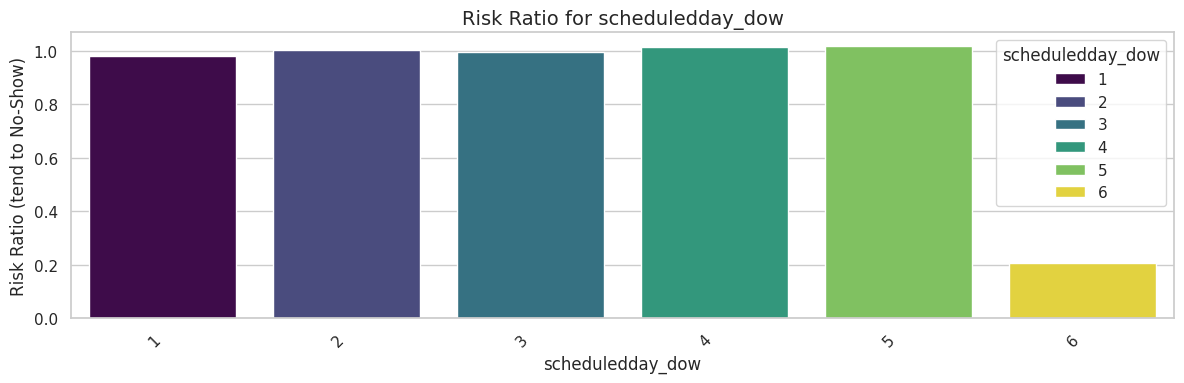

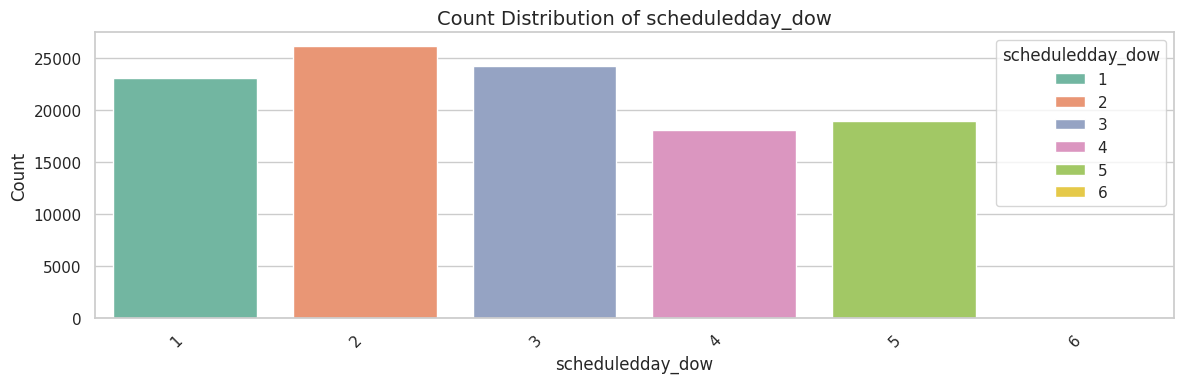

appointmentday_dow


,mean,count,diff,risk_ratio_tend_to_No_Show
appointmentday_dow,,,,
1,0.206437,22714,0.004504,1.022304
2,0.200874,25638,-0.001059,0.994756
3,0.196861,25866,-0.005072,0.974884
4,0.193494,17246,-0.008438,0.958212
5,0.212261,19019,0.010329,1.051150
6,0.230769,39,0.028837,1.142803


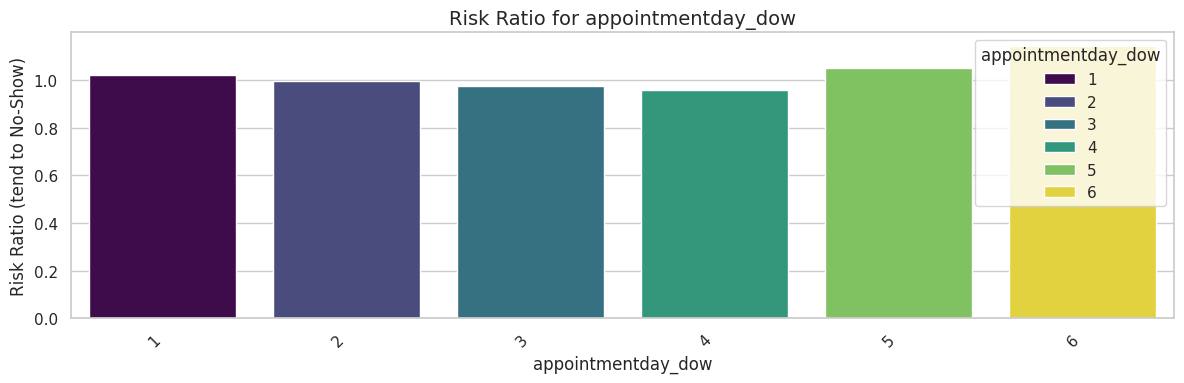

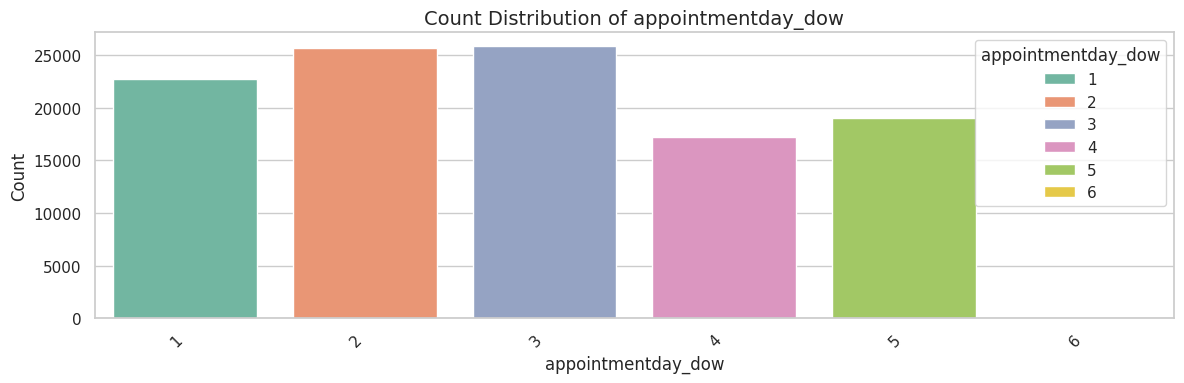

In [46]:
# risk ratio for the days of week columns

sns.set(style="whitegrid")
for col in ['scheduledday_dow', 'appointmentday_dow']:
  print(col)
  df_group = df.groupby(col).no_show.agg(['mean', 'count'])
  df_group['diff'] = df_group['mean'] - global_no_show
  df_group['risk_ratio_tend_to_No_Show'] = df_group['mean'] / global_no_show
  display(df_group)
  print()

  # visualization for the bar plot
  plt.figure(figsize=(12, 4))
  sns.barplot(
  x=df_group.index,
  y=df_group['risk_ratio_tend_to_No_Show'],
  palette='viridis',
  hue=df_group.index  # Explicitly assign x-variable to hue
  )
  plt.title(f'Risk Ratio for {col}', fontsize=14)
  plt.xlabel(col, fontsize=12)
  plt.ylabel('Risk Ratio (tend to No-Show)', fontsize=12)
  plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

  plt.tight_layout()
  plt.show()


  # visualization for the Count Plot
  plt.figure(figsize=(12, 4))
  sns.countplot(
  data=df,
  x=col,
  palette='Set2',
  hue=col,  # Explicitly assign x-variable to hue
  dodge=False  # Prevent splitting bars for the same category
  )
  plt.title(f'Count Distribution of {col}', fontsize=14)
  plt.xlabel(col, fontsize=12)
  plt.ylabel('Count', fontsize=12)
  plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

  plt.tight_layout()
  plt.show()

> Summarizing risk ratio (feature importance) analysis we see that
* features  gender and alcoholism  are not very deterministic in outcome of Show/No-Show



> Mutual Information


In [47]:
# importing the library
from sklearn.metrics import mutual_info_score

In [48]:
# the features with int dtypes are also considered as they are categorical in context
columns_mi = ['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'gender', 'neighbourhood', 'scheduledday_dow', 'appointmentday_dow', 'scheduledday_month', 'appointmentday_month']

In [49]:
# calculate and store the Mutual Information and display
mi_scores = {}
for col in columns_mi:
  mi_scores[col] = format(mutual_info_score(df[col], df.no_show), '.10f')
mi_scores

{'scholarship': '0.0004102436',
 'hipertension': '0.0006544609',
 'diabetes': '0.0001178947',
 'alcoholism': '0.0000000162',
 'handcap': '0.0000296269',
 'sms_received': '0.0077103958',
 'gender': '0.0000085334',
 'neighbourhood': '0.0021969225',
 'scheduledday_dow': '0.0000473533',
 'appointmentday_dow': '0.0001244392',
 'scheduledday_month': '0.0151074805',
 'appointmentday_month': '0.0003104999'}

In [50]:
# Convert string values to float and sort
sorted_mi_scores = dict(sorted(mi_scores.items(), key=lambda item: float(item[1]), reverse=True))
sorted_mi_scores

{'scheduledday_month': '0.0151074805',
 'sms_received': '0.0077103958',
 'neighbourhood': '0.0021969225',
 'hipertension': '0.0006544609',
 'scholarship': '0.0004102436',
 'appointmentday_month': '0.0003104999',
 'appointmentday_dow': '0.0001244392',
 'diabetes': '0.0001178947',
 'scheduledday_dow': '0.0000473533',
 'handcap': '0.0000296269',
 'gender': '0.0000085334',
 'alcoholism': '0.0000000162'}

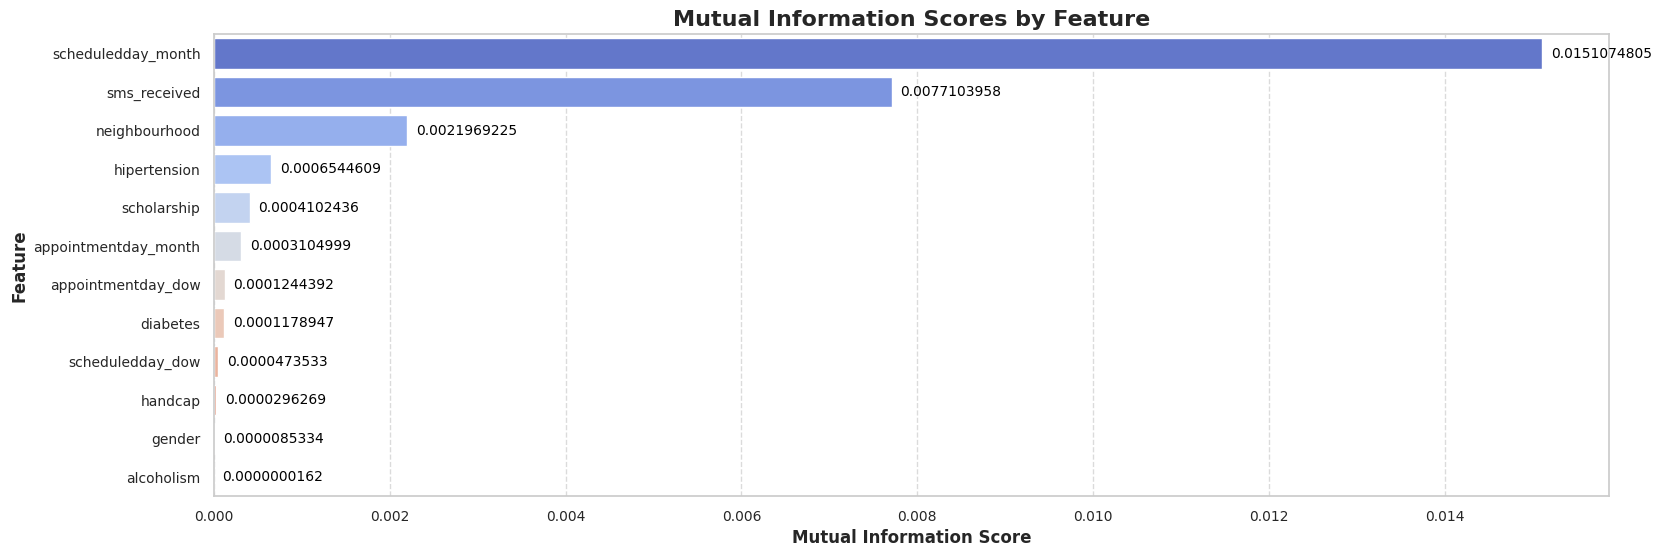

In [51]:
# Visualizing the comparision

# Convert string values to floats and sort in descending order
mi_scores = {k: float(v) for k, v in mi_scores.items()}
sorted_mi_scores = dict(sorted(mi_scores.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(18, 6))
sns.barplot(
    x=list(sorted_mi_scores.values()),
    y=list(sorted_mi_scores.keys()),
    palette="coolwarm",
    hue=list(sorted_mi_scores.keys())  # Explicitly assign hue
)

# Add annotations to the bars
for index, value in enumerate(sorted_mi_scores.values()):
    plt.text(value + 0.0001, index, f'{value:.10f}', va='center', fontsize=10, color='black')

# Add labels and title
plt.title('Mutual Information Scores by Feature', fontsize=16, weight='bold')
plt.xlabel('Mutual Information Score', fontsize=12, weight='bold')
plt.ylabel('Feature', fontsize=12, weight='bold')

# Customize axis ticks and gridlines for better aesthetics
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)


> So we see that the features **scheduledday_month** and **sms_received** are the most deterministic in Show/No outcome as per Mutual Information (feature importance) analysis

> ROC AUC **feature importance** : ROC AUC could also be used to evaluate feature importance of continuous variables.


 We can explore how many previous appointments a patient had, if any. And how many of those, the patient had missed. Let us see if these 2 numerical features can prove to be significant or not in having any deterministic abiliity for the no_show outcome

In [52]:
# remove the timestamp from the dates
df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.date
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.date

# convert it back from the object dtype to datetime dtype from previous line(s)
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# Ensure the dataset is sorted by patientid and scheduledday
df = df.sort_values(by=['patientid', 'scheduledday'])

# Group by patientid and calculate cumulative counts
df['previous_appointments'] = df.groupby('patientid').cumcount()

# Calculate cumulative missed appointments for each patient, resetting index to align with df
df['missed_appointments'] = df.groupby('patientid')['no_show'].apply(
    lambda x: x.shift().cumsum()
).reset_index(level=0, drop=True) # Reset index to align with df

# Fill NaN values for the first appointment (no previous history)
df['missed_appointments'] = df['missed_appointments'].fillna(0).astype(int)



> We can also have a sum count of the health issues a patient has who had made an appointment.



In [53]:
df['cum_healthissues'] = df[['hipertension', 'diabetes', 'alcoholism', 'handcap']].sum(axis=1)

In [54]:
df.cum_healthissues.value_counts()

,count
cum_healthissues,
0,84115
1,18118
2,7658
3,618
4,13


In [55]:
# compilation of the numerical features in the dataset
numerical_columns_fi = ['age', 'days_to_wait', 'cum_healthissues', 'previous_appointments', 'missed_appointments', 'scheduledday_hr', 'scheduledday_date', 'appointmentday_date']

In [56]:
# first let us have a look at the statistics for these columns
df[numerical_columns_fi].describe()

,age,days_to_wait,cum_healthissues,previous_appointments,missed_appointments,scheduledday_hr,scheduledday_date,appointmentday_date
count,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,37.089041,10.184253,0.319755,1.270209,0.230361,10.774497,14.252438,12.499620
std,23.110064,15.255115,0.625344,3.913452,0.678962,3.216200,9.345727,9.056561
min,-1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,8.000000,6.000000,5.000000
50%,37.000000,4.000000,0.000000,0.000000,0.000000,10.000000,13.000000,10.000000
75%,55.000000,15.000000,0.000000,1.000000,0.000000,13.000000,22.000000,19.000000
max,115.000000,179.000000,4.000000,87.000000,17.000000,21.000000,31.000000,31.000000


> We see an outlier of 115 years and -1 years (which is also anomaly) in age feature which we will remove.

In [57]:
# Dropping the age outliers: 115 and -1 years
df = df.drop(df[(df['age'] == 115) | (df['age'] == -1)].index)



> Let us an insight on the age feature with visualisation



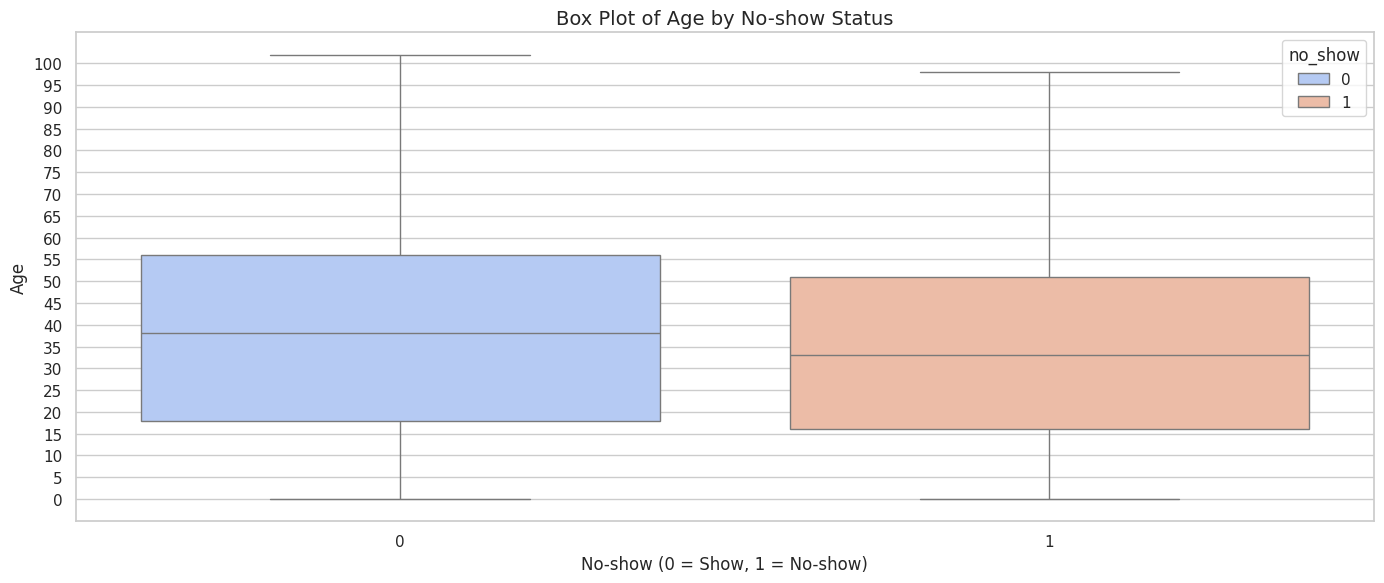

In [58]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='no_show', y='age', hue='no_show', palette='coolwarm', showfliers=False)

# Add labels and a title
plt.title('Box Plot of Age by No-show Status', fontsize=14)
plt.xlabel('No-show (0 = Show, 1 = No-show)', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Set yticks with a range and interval of 5
plt.yticks(range(int(df['age'].min()), int(df['age'].max()) + 1, 5))

# Show the plot
plt.tight_layout()
plt.show()



> So we see from the Interquartile Ranges that
* For people attending/showing-up for their appointments, 25% of them are below like 18 yrs, 25% of them  from like 18yrs to 38 yrs, 25 % of them from like 38yrs to 56 yrs
* For people not showing-up for their appointments, 25% of them are below like 16 yrs, 25% of them  from like 16 yrs to 33 yrs, 25 % of them from like 33 yrs to 51 yrs





> Now let us evaluate the AUC ROC scores of these numerical/continuous features



In [59]:
# importing the required libraries
from sklearn.metrics import roc_auc_score

score_ras = {}

def roc_auc_feature_importance(num_cols):

  for cc in num_cols:
    # calculate the AUC score
    auc = roc_auc_score(df.no_show.values, df[cc])

    # check whether calculated auc score < 0.5 and if yes, invert the same
    if auc < 0.5:
      print('for ', cc, ' auc is negative')
      auc =roc_auc_score(df.no_show.values, -df[cc])

    # append the score to the dictionary
    score_ras[cc] = auc

    # print the AUC corresponding to the feature
    print(f'AUC for {cc} is {auc}')
    print()
  # Numerical variable/feature having the highest AUC
  print(f'\nNumerical variable/feature having the highest AUC is {max(score_ras, key=score_ras.get)}')

In [60]:
# calling the function
roc_auc_feature_importance(numerical_columns_fi)

for  age  auc is negative
AUC for age is 0.5440882375098546

AUC for days_to_wait is 0.6982713487371479

for  cum_healthissues  auc is negative
AUC for cum_healthissues is 0.5175152406886148

for  previous_appointments  auc is negative
AUC for previous_appointments is 0.5128366161934503

AUC for missed_appointments is 0.5324184754644835

AUC for scheduledday_hr is 0.5464968123510343

AUC for scheduledday_date is 0.534147141971689

AUC for appointmentday_date is 0.5059924202380675


Numerical variable/feature having the highest AUC is days_to_wait


In [61]:
# visualization for this
def plot_auc_scores(auc_scores):
    # Convert the dictionary of feature AUC scores into a sorted DataFrame
    auc_df = pd.DataFrame(list(auc_scores.items()), columns=['Feature', 'AUC'])
    auc_df = auc_df.sort_values(by='AUC', ascending=False)

    # Set the plot size
    plt.figure(figsize=(12, 6))

    # Create a barplot
    sns.barplot(x='AUC', y='Feature', data=auc_df, palette='coolwarm', hue=list(auc_scores.keys()))

    # Add labels and title
    plt.title('AUC Scores for Continuous Features', fontsize=16)
    plt.xlabel('AUC Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

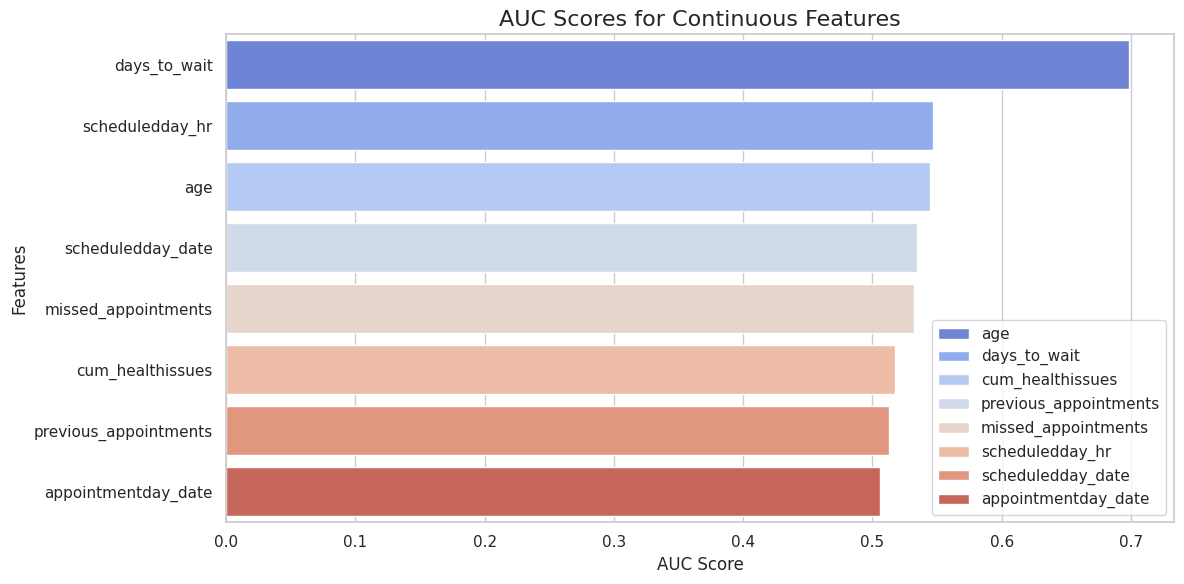

In [62]:
# Call the plot function with the AUC scores dictionary
plot_auc_scores(score_ras)



> Interpretation of Results as per ROC AUC (feature importance) analysis

* *days_to_wait*: Strong predictive power with an AUC of 0.698, suggesting this feature has a strong association with no_show.
* *scheduledday_hr*: It holds moderate predictive value in its inverted form.
* *age* :  Initially negative but after inversion, it holds moderate predictive value in its inverted form.



> Correlation



In [63]:
# preparing the copy of the full train dataset for correlation operation
df_corr = df.copy()
del df_corr['patientid']
del df_corr['appointmentid']
del df_corr['neighbourhood'] # Removed the extra space from the column name
del df_corr['scheduledday']
del df_corr['appointmentday']
df_corr['gender'] = (df_corr.gender == 'F').astype(int)

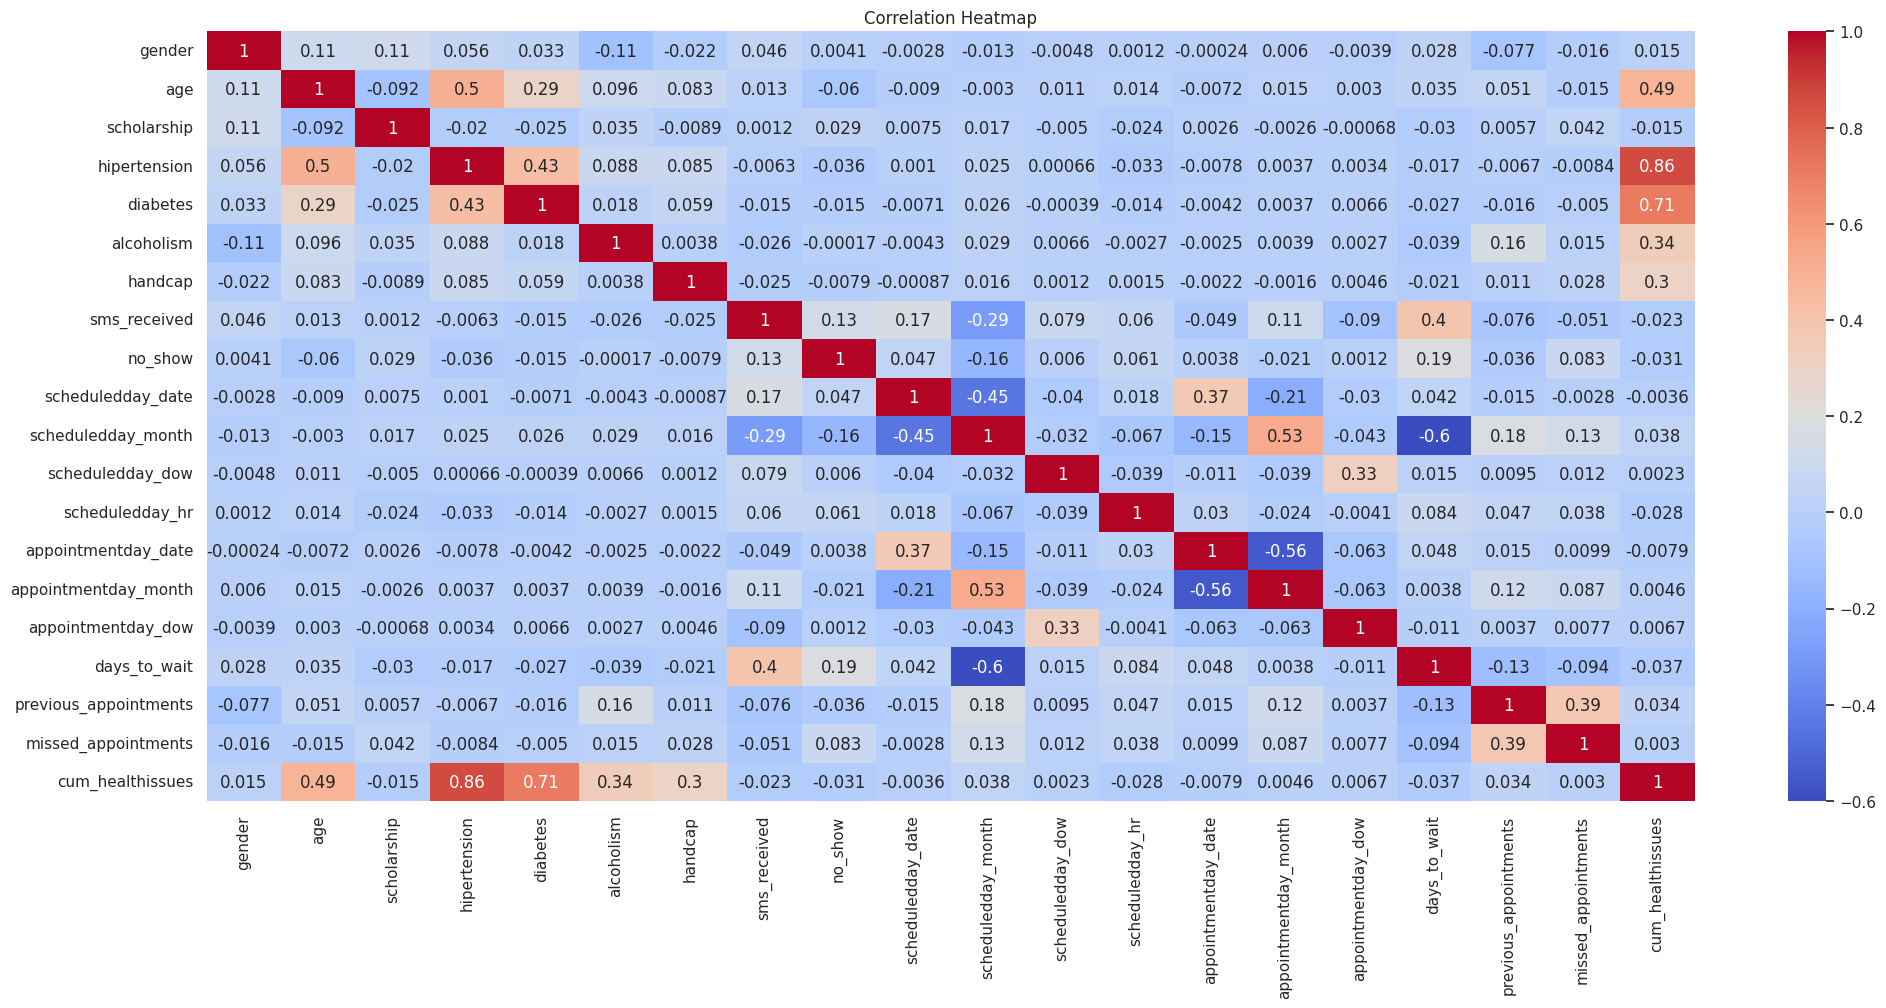

In [64]:
# generating the heatmap for correlation measure of the features
sns.set(style="whitegrid")
plt.figure(figsize=(24, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


> From the correlation (feature importance) analysis with the heatmap, we can see, among other significant correlations between features, that the highest correlated feature for determining No-show is the **days_to_wait** feature



> We shall save the current state of the cleaned and prepared dataframe df so we do not have go through the Data Cleaning & Preparation and EDA with feature engineering part again to start with the Model Training & Selction part (if we take break in between!)



In [65]:
df.to_pickle('df_cleaned_prepared_for_model_building.pkl')

3. **Model selection process and parameter tuning (Model Training with Multiple Models, Parameter Tuning and Selection of Final Model)**

---



In [66]:
# importing the basic  libraries
import pandas as pd
import numpy as np

In [67]:
# loading the cleaned and prepared dataframe from the pickle file saved at the end of EDA
df_model = pd.read_pickle('df_cleaned_prepared_for_model_building.pkl')

In [68]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110516 entries, 100517 to 76224
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   patientid              110516 non-null  int64         
 1   appointmentid          110516 non-null  int64         
 2   gender                 110516 non-null  object        
 3   scheduledday           110516 non-null  datetime64[ns]
 4   appointmentday         110516 non-null  datetime64[ns]
 5   age                    110516 non-null  int64         
 6   neighbourhood          110516 non-null  object        
 7   scholarship            110516 non-null  int64         
 8   hipertension           110516 non-null  int64         
 9   diabetes               110516 non-null  int64         
 10  alcoholism             110516 non-null  int64         
 11  handcap                110516 non-null  int64         
 12  sms_received           110516 non-null  int64

In [69]:
df_model.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,...,scheduledday_month,scheduledday_dow,scheduledday_hr,appointmentday_date,appointmentday_month,appointmentday_dow,days_to_wait,previous_appointments,missed_appointments,cum_healthissues
100517,39217,5751990,F,2016-05-31,2016-06-03,44,PRAIA DO SUÁ,0,0,0,...,5,2,10,3,6,5,3,0,0,0
105430,43741,5760144,M,2016-06-01,2016-06-01,39,MARIA ORTIZ,0,0,1,...,6,3,14,1,6,3,0,0,0,1
3950,93779,5712759,F,2016-05-18,2016-05-18,33,CENTRO,0,0,0,...,5,3,9,18,5,3,0,0,0,0
73303,141724,5637648,M,2016-04-29,2016-05-02,12,FORTE SÃO JOÃO,0,0,0,...,4,5,7,2,5,1,3,0,0,0
73228,537615,5637728,F,2016-04-29,2016-05-06,14,FORTE SÃO JOÃO,0,0,0,...,4,5,7,6,5,5,7,0,0,0


In [70]:
df_model.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show',
       'scheduledday_date', 'scheduledday_month', 'scheduledday_dow',
       'scheduledday_hr', 'appointmentday_date', 'appointmentday_month',
       'appointmentday_dow', 'days_to_wait', 'previous_appointments',
       'missed_appointments', 'cum_healthissues'],
      dtype='object')

In [71]:
# as seen above indeces are not squential and so we need to reset them
df_model.reset_index(drop=True, inplace=True)

In [72]:
# patientid & appointmentid are identifiers
# all necessary information from 'scheduledday', 'appointmentday' were already extracted and feature engineered
# there are 81 unique values values of neighbourhood and the large categorical range in the feature may cause overfitting in the model
drop_columns = ['patientid', 'appointmentid', 'neighbourhood', 'scheduledday', 'appointmentday']

In [73]:
# as such, these columns are being dropped
df_model.drop(drop_columns, axis=1, inplace=True)

In [74]:
df_model.shape

(110516, 20)

In [75]:
# I choose F as 1 because number females are almost twice that of males and so more 1s & lesser 0s would be generated.
#Lesser zeros would prevent the increase of sparse-ness in the dataset
df_model.gender = (df_model.gender == 'F').astype(int)

In [76]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110516 entries, 0 to 110515
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   gender                 110516 non-null  int64
 1   age                    110516 non-null  int64
 2   scholarship            110516 non-null  int64
 3   hipertension           110516 non-null  int64
 4   diabetes               110516 non-null  int64
 5   alcoholism             110516 non-null  int64
 6   handcap                110516 non-null  int64
 7   sms_received           110516 non-null  int64
 8   no_show                110516 non-null  int64
 9   scheduledday_date      110516 non-null  int32
 10  scheduledday_month     110516 non-null  int32
 11  scheduledday_dow       110516 non-null  int32
 12  scheduledday_hr        110516 non-null  int32
 13  appointmentday_date    110516 non-null  int32
 14  appointmentday_month   110516 non-null  int32
 15  appointmentday_do

In [77]:
df_model.no_show.value_counts()

,count
no_show,
0,88205
1,22311


In [78]:
# import libraries for the train test split
from sklearn.model_selection import train_test_split

In [79]:
#Splitting the dataset into full train (for training with cross validation) and test set : 20% test, 80% full train
# as the target class data is imbalanced [roughly 80% show and 20% no show],
#we use stratify to maintain the same proportion of positive class labels (0-->show & 1-->no_show) in the individual splits to mitigate imbalance effect while trainning the model
df_full_train, df_test = train_test_split(df_model, test_size=0.2, random_state=42, stratify=df_model['no_show'])

# similarly for the train and validation set
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=42, stratify=df_full_train['no_show'])

In [80]:
# setting the target dataset for full_train and tesr
y_full_train = df_full_train.no_show.values
y_test = df_test.no_show.values

# similarly for the train and validation set
y_train = df_train.no_show.values
y_val = df_val.no_show.values

In [81]:
# removing the target feature from the full_train and test dataset
del df_full_train['no_show']
del df_test['no_show']

# similarly for the train and validation set
del df_train['no_show']
del df_val['no_show']

In [82]:
# verifying stratification
y_full_train.mean(), y_test.mean()

(0.20188435958919604, 0.20186391603329715)

In [83]:
# verifying stratification
y_train.mean(), y_val.mean()

(0.20189117451891175, 0.20186391603329715)

In [84]:
# checking the datasets shape
df_full_train.shape, df_test.shape, y_full_train.shape, y_test.shape

((88412, 19), (22104, 19), (88412,), (22104,))

In [85]:
# checking the datasets shape
df_train.shape, df_val.shape, y_train.shape, y_val.shape

((66308, 19), (22104, 19), (66308,), (22104,))

In [86]:
# importing libraries for the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [88]:
# importing required libraries
from sklearn.model_selection import StratifiedKFold
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score



> Function to train models (Logistic Regression, DecisionTreeClasifier & RandomForrestClassifier)

> with 5 fold cross validation on the full_train  dataset



In [89]:
# function to train models with cross validation
def train_model_cross_validation(model, X_train, y_train):

  # creating the StratifiedKFold object with 5 folds: due to the imbalance in target class label 80%-20% we wse StratifiedKFold so that the proportion of taret class labels are maintained in each fold
  skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  # initializing the empty lists to hold the scores and metrics
  auc_scores = []
  precision_0_list = []
  recall_0_list = []
  f1_score_0_list = []
  precision_1_list = []
  recall_1_list = []
  f1_score_1_list = []
  weighted__avg_F1 = []
  accuracy_list = []

  # skfold object returns indices each for the train and validation datasets for each fold
  for train_index, val_index in skfold.split(X_train, y_train):

    X_train_this = X_train.iloc[train_index]
    X_val_this = X_train.iloc[val_index]

    y_train_this = y_train[train_index]
    y_val_this = y_train[val_index]
    #print('see this... ', y_train_this.mean(), y_val_this.mean())

    # Train the model and make predictions
    model.fit(X_train_this,y_train_this)
    y_pred_this = model.predict_proba(X_val_this)[:, 1]
    y_pred_hard_this = model.predict(X_val_this)

    auc_this = roc_auc_score(y_val_this, y_pred_this)
    auc_scores.append(auc_this)

    # Get the classification report and extract metrics
    report = classification_report(y_val_this, y_pred_hard_this, output_dict=True)

    # Extract precision, recall, and f1-score for class 0 (Show)
    precision_0_list.append(round(report['0']['precision'],2))
    recall_0_list.append(round(report['0']['recall'],2))
    f1_score_0_list.append(round(report['0']['f1-score'],2))

    # Extract precision, recall, and f1-score for class 1 (No Show)
    precision_1_list.append(round(report['1']['precision'],2))
    recall_1_list.append(round(report['1']['recall'],2))
    f1_score_1_list.append(round(report['1']['f1-score'],2))

    # Calculate weighted average F1 Score
    weighted__avg_F1.append(round(report['weighted avg']['f1-score'],2))

    # Calculate accuracy and store it
    accuracy_this = accuracy_score(y_val_this, y_pred_hard_this)
    accuracy_list.append(round(accuracy_this,2))

  print(f'Mean AUC score is {round(np.mean(auc_scores), 3)} and their Standard Deviation is {round(np.std(auc_scores), 3)}')
  print()
  print()

  # Create a DataFrame with all the results
  results_df = pd.DataFrame({
      'AUC': auc_scores,
      'Precision_0': precision_0_list,
      'Recall_0': recall_0_list,
      'F1_Score_0': f1_score_0_list,
      'Precision_1': precision_1_list,
      'Recall_1': recall_1_list,
      'F1_Score_1': f1_score_1_list,
      'Weighted_Avg_F1' : weighted__avg_F1,
      'Accuracy': accuracy_list
  })

  return results_df



> Evaluating best parameters for Logistic Regression with the **train** and **validation** dataset



In [90]:
# finding the best auc score for the various solver values of the Logisttic regression model
scores_lr_s = []
max_iter = 1000 # since solvers like ilfgs and saga have convergence errors (fail to converge) on lower max_iter values
solvers = ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
class_weight = 'balanced' # this is a very significant parameter in this case as we have a 80%[show] - 205[no_show] imbalance in class labels of the target feature
for solver in solvers:

    lr = LogisticRegression(solver = solver, max_iter = max_iter, random_state=42, class_weight=class_weight)
    lr.fit(df_train, y_train)
    y_pred = lr.predict_proba(df_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores_lr_s.append((solver, auc))

In [91]:
# prepare a dataframe with the scores
columns = ['solver', 'auc_score']
df_scores_lr_s = pd.DataFrame(scores_lr_s, columns=columns)
# and get iteration corresponding to best auc score
df_scores_lr_s[df_scores_lr_s['auc_score'] == df_scores_lr_s['auc_score'].max()]

,solver,auc_score
3,saga,0.692619


In [92]:
# finding the best auc score for the various C values of the Logisttic regression model
scores_lr_C = []
max_iter = 1000 # since solvers like ilfgs and saga have convergence errors (fail to converge) on lower max_iter values
solver = 'saga' # as evaluated from the above step
C_list = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]

for value in C_list:

    lr = LogisticRegression(solver = solver, max_iter = max_iter, C=value, random_state=42, class_weight='balanced', n_jobs = -1)
    lr.fit(df_train, y_train)
    y_pred = lr.predict_proba(df_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores_lr_C.append((value, auc))

In [93]:
# prepare a dataframe with the scores
columns = ['C_value', 'auc_score']
df_scores_lr_C = pd.DataFrame(scores_lr_C, columns=columns)
# and get iteration corresponding to best auc score
df_scores_lr_C[df_scores_lr_C['auc_score'] == df_scores_lr_C['auc_score'].max()]

,C_value,auc_score
0,0.001,0.694235




> Training the **full_train** dataset with 5 fold cross **validation** u*sing the best evaluated parameters for the Logistic Regeression model*.



In [94]:
model_lr = LogisticRegression(solver= 'saga', max_iter=1000, C = 0.001, random_state=42,  class_weight='balanced')

# training the model with cross validations and outputting the scores
train_model_cross_validation(model_lr, df_full_train, y_full_train)

Mean AUC score is 0.686 and their Standard Deviation is 0.002




,AUC,Precision_0,Recall_0,F1_Score_0,Precision_1,Recall_1,F1_Score_1,Weighted_Avg_F1,Accuracy
0,0.684986,0.87,0.69,0.77,0.33,0.60,0.42,0.70,0.67
1,0.684828,0.87,0.69,0.77,0.32,0.59,0.42,0.70,0.67
2,0.687398,0.87,0.69,0.77,0.33,0.59,0.42,0.70,0.67
3,0.684903,0.87,0.68,0.76,0.32,0.60,0.42,0.69,0.66
4,0.689598,0.87,0.69,0.77,0.33,0.60,0.42,0.70,0.67




>  Evaluating best parameters for DecisionTreeClassifier with the **train** and **validation** dataset



In [95]:
# finding the best max_depth (depth corresponding to best auc score) in the Decision Tree
tree_depths = np.arange(1, 20)
tree_depths = list(tree_depths) # Convert to a list
tree_depths.append(None)
class_weight = 'balanced' # this is a very significant parameter in this case as we have a 80%[show] - 205[no_show] imbalance in class labels of the target feature
for depth in tree_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state = 42, class_weight=class_weight)
    dt.fit(df_train, y_train)

    y_pred = dt.predict_proba(df_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    #print('%4s -> %.3f' % (depth, auc))
    print(f'{depth} -> {auc:.3f}')

1 -> 0.672
2 -> 0.711
3 -> 0.731
4 -> 0.737
5 -> 0.743
6 -> 0.745
7 -> 0.747
8 -> 0.745
9 -> 0.741
10 -> 0.732
11 -> 0.722
12 -> 0.710
13 -> 0.696
14 -> 0.679
15 -> 0.667
16 -> 0.653
17 -> 0.638
18 -> 0.628
19 -> 0.620
None -> 0.573


In [96]:
# finding the best min_samples_leaf value (min_samples_leaf corresponding to best auc score) in the Decision Tree
scores_d = []
class_weight = 'balanced' # this is a very significant parameter in this case as we have a 80%[show] - 205[no_show] imbalance in class labels of the target feature

for tree_depth in [6, 7, 8]: # getting the depths for 3 best auc scores from the above output
    for leaf_samples in [1, 5, 10, 15, 20, 50, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=tree_depth, min_samples_leaf=leaf_samples, random_state=42, class_weight=class_weight)
        dt.fit(df_train, y_train)

        y_pred = dt.predict_proba(df_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores_d.append((tree_depth, leaf_samples, round(auc, 3)))

In [97]:
# prepare a dataframe with the scores
columns = ['max_depth', 'min_samples_leaf', 'auc_score']
df_scores_dt = pd.DataFrame(scores_d, columns=columns)

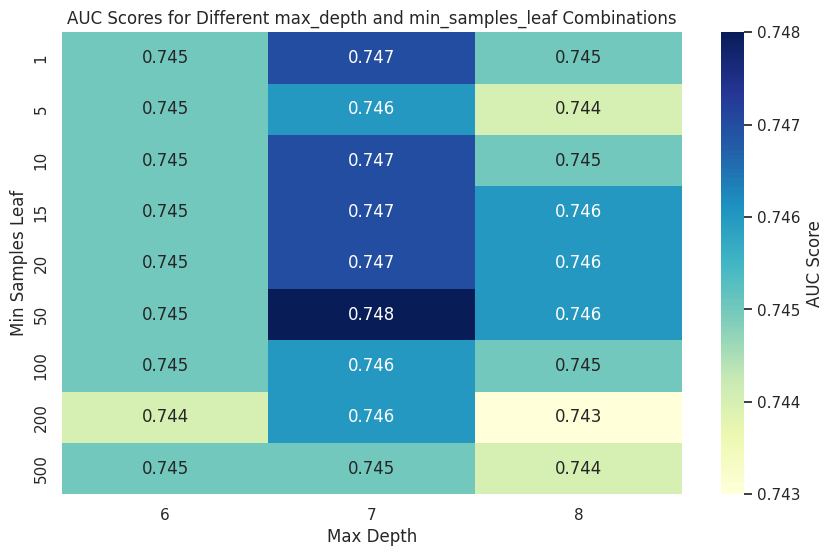

In [98]:
# Pivot the dataframe for heatmap visualization
pivot_df = df_scores_dt.pivot(index='min_samples_leaf', columns='max_depth', values='auc_score')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_df,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    cbar_kws={'label': 'AUC Score'}
)
plt.title("AUC Scores for Different max_depth and min_samples_leaf Combinations")
plt.xlabel("Max Depth")
plt.ylabel("Min Samples Leaf")
plt.show()

In [99]:
# Sort the dataframe by AUC (descending) and min_samples_leaf (ascending)
best_row = df_scores_dt.sort_values(by=["auc_score", "min_samples_leaf"], ascending=[False, True]).iloc[0]

# Explicitly format the output for display
formatted_row = {
    "max_depth": int(best_row["max_depth"]),
    "min_samples_leaf": int(best_row["min_samples_leaf"]),
    "auc": float(best_row["auc_score"])  # Ensure auc remains a float
}

# Print the formatted row
print(formatted_row)

{'max_depth': 7, 'min_samples_leaf': 50, 'auc': 0.748}


Training the **full_train** dataset with 5 fold **cross validation** u*sing the best evaluated parameters for the DecisionTreeClassifier model*.


In [100]:
# here we acknowledge the fact that for increase in min_sample_leaf value from 1 to 50,
# there is only a nominal change in auc score of 0.001
model_dt = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=50, class_weight='balanced')
# training the model with cross validations and outputting the scores
train_model_cross_validation(model_dt, df_full_train, y_full_train)

Mean AUC score is 0.739 and their Standard Deviation is 0.002




,AUC,Precision_0,Recall_0,F1_Score_0,Precision_1,Recall_1,F1_Score_1,Weighted_Avg_F1,Accuracy
0,0.735756,0.92,0.53,0.67,0.31,0.83,0.45,0.63,0.59
1,0.737365,0.92,0.55,0.69,0.31,0.81,0.45,0.64,0.60
2,0.739968,0.93,0.52,0.67,0.31,0.84,0.45,0.62,0.59
3,0.742168,0.92,0.54,0.68,0.31,0.82,0.45,0.63,0.60
4,0.739040,0.93,0.50,0.65,0.30,0.85,0.45,0.61,0.57





>  Evaluating best parameters for RandomForestClassifier with the **train** and **validation** dataset





In [101]:
# find the best n_estimators value for the Random Forrest
scores_rf = []
class_weight = 'balanced' # this is a very significant parameter in this case as we have a 80%[show] - 205[no_show] imbalance in class labels of the target feature

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs = -1, class_weight=class_weight)
    rf.fit(df_train, y_train)

    y_pred = rf.predict_proba(df_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores_rf.append((n, auc))

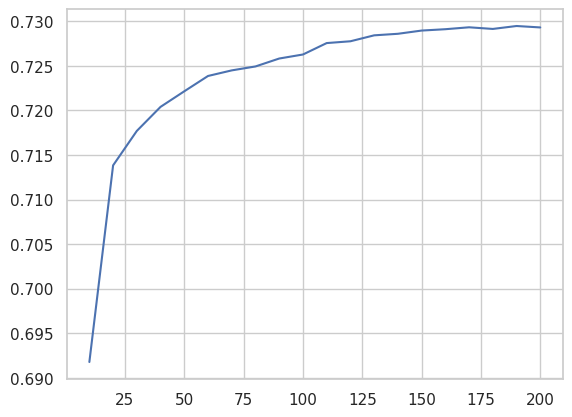

In [102]:
# prepare a dataframe with the scores
df_scores_rf1 = pd.DataFrame(scores_rf, columns=['n_estimators', 'auc_score'])
# and plot the scores with n_estimators (number of trees) on X-axis and auc score on the Y-axis
plt.plot(df_scores_rf1.n_estimators, df_scores_rf1.auc_score)

In [103]:
# best value of auc for n_estimators
df_scores_rf1[df_scores_rf1['auc_score'] == df_scores_rf1['auc_score'].max()]

,n_estimators,auc_score
18,190,0.729467


In [104]:
# finding the best max_depth parameter value corresponding to highest auc score in the range of n_estimators from 10 to 190 (best value we got at above step)
scores_rf_d = []
class_weight = 'balanced' # this is a very significant parameter in this case as we have a 80%[show] - 205[no_show] imbalance in class labels of the target feature

for d in [7, 10, 15]: # since we got best auc for max depth of 7 for the decison tree, we start at it and end near its double
    for n in range(10, 190, 10): # range maximum to 200 since we got best auc_score at n_estimators = 190 in the above step
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=42,
                                    n_jobs = -1, class_weight=class_weight)
        rf.fit(df_train, y_train)

        y_pred = rf.predict_proba(df_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores_rf_d.append((d, n, auc))

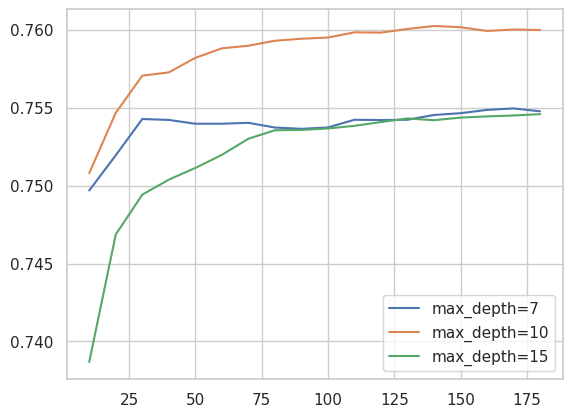

In [105]:
# prepare a dataframe with the scores
columns = ['max_depth', 'n_estimators', 'auc_score']
df_scores_rf2 = pd.DataFrame(scores_rf_d, columns=columns)

# and plot the scores for each max_depth parameter with n_estimators (number of trees) on X-axis and auc score on the Y-axis
for depth in [7, 10, 15]:
    depth_section = df_scores_rf2[df_scores_rf2.max_depth == depth]
    plt.plot(depth_section.n_estimators, depth_section.auc_score,
             label = f'max_depth={depth}')

plt.legend()

In [106]:
# so best max_depth is :
df_scores_rf2[df_scores_rf2['auc_score'] == df_scores_rf2['auc_score'].max()]

,max_depth,n_estimators,auc_score
31,10,140,0.760226


In [107]:
# finding the best min_samples_leaf parameter value corresponding to highest auc score in the range of n_estimators from 10 to 200
scores_leaf = []
leaf_samples = [1, 3, 5, 10, 50] # we keep thee upper limit as 50 since we got best min_samples_leaf as 50 at the decision tree paramenter evaluation
max_depth = 10 # best max_depth evaluated from above step
class_weight = 'balanced' # this is a very significant parameter in this case as we have a 80%[show] - 205[no_show] imbalance in class labels of the target feature

for sample in leaf_samples:
    for num in range(10, 201, 10): # range maximum to 200
        rf = RandomForestClassifier(n_estimators=num,
                                    max_depth=max_depth,
                                    min_samples_leaf=sample,
                                    random_state=42,
                                    n_jobs = -1, class_weight=class_weight)
        rf.fit(df_train, y_train)

        y_pred = rf.predict_proba(df_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores_leaf.append((sample, num, auc))

In [108]:
# prepare a dataframe with the scores
columns = ['min_samples_leaf', 'n_estimators', 'auc_scores']
df_scores_rf3 = pd.DataFrame(scores_leaf, columns=columns)

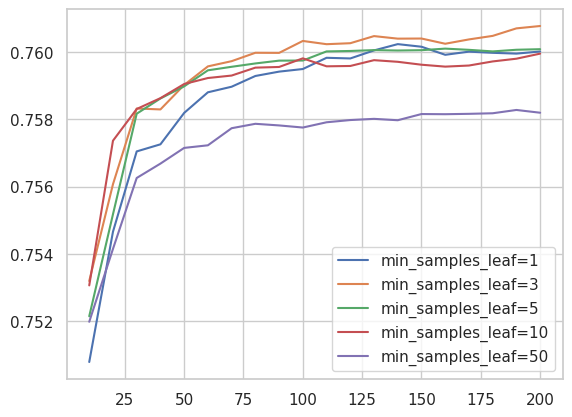

In [109]:
# and plot the scores for each min_samples_leaf  parameter with n_estimators (number of trees) on X-axis and auc score on the Y-axis
for leaf_sample in [1, 3, 5, 10, 50]:
    leaf_section = df_scores_rf3[df_scores_rf3.min_samples_leaf == leaf_sample]
    plt.plot(leaf_section.n_estimators, leaf_section.auc_scores, label = f'min_samples_leaf={leaf_sample}')

plt.legend()

In [110]:
# best value of min_samples_leaf
df_scores_rf3[df_scores_rf3['auc_scores'] == df_scores_rf3['auc_scores'].max()]

,min_samples_leaf,n_estimators,auc_scores
39,3,200,0.760764




> Training the **full_train** dataset with 5 fold **cross validation** u*sing the best evaluated parameters for the RandomForestClassifier model*.




In [111]:
model_rf = RandomForestClassifier(n_estimators=200,
                                    max_depth=10,
                                    min_samples_leaf=3,
                                    random_state=42,
                                    n_jobs = -1, class_weight='balanced')
# training the model with cross validations and outputting the scores
train_model_cross_validation(model_rf, df_full_train, y_full_train)

Mean AUC score is 0.748 and their Standard Deviation is 0.002




,AUC,Precision_0,Recall_0,F1_Score_0,Precision_1,Recall_1,F1_Score_1,Weighted_Avg_F1,Accuracy
0,0.744697,0.92,0.56,0.69,0.32,0.81,0.45,0.64,0.61
1,0.747255,0.92,0.57,0.70,0.32,0.80,0.45,0.65,0.61
2,0.750296,0.92,0.56,0.70,0.32,0.80,0.45,0.65,0.61
3,0.749840,0.92,0.55,0.69,0.31,0.82,0.45,0.64,0.60
4,0.747155,0.92,0.56,0.70,0.32,0.80,0.45,0.65,0.61



>  Evaluating best parameters for XGBoost with the **train** and **validation** dataset



In [112]:
# import the libraries
import xgboost as xgb
from xgboost import DMatrix, train

In [113]:
# fundtion to find best value of input xgb_params parameter for the model
def train_tune_xgboost(dtrain, dval,  param_name, param_values, base_params):
  scores_param = {}
  #for value in param_values:
  for value in param_values:
    xgb_params = base_params.copy()  # Copy base params to avoid overwriting
    xgb_params[param_name] = value
    print(xgb_params)
    # To capture evaluation results
    evals_result = {}
    #output_key = f"eta={xgb_params['eta']}"
    output_key = f"{param_name}={xgb_params[param_name]}"
    # Training the model with tracking
    model = train(
        params=xgb_params,
        dtrain=dtrain,
        num_boost_round=200, # boost rounds is taken to be 200 as we had seen best n_estimators = 200 earlier for the tuned RandomForestClassifier model
        evals=[(dtrain, 'train'), (dval, 'val')],
        evals_result=evals_result,  # This captures the train and val results
        verbose_eval=10
    )

    # Store scores with the eta key
    scores_param[output_key] = evals_result['val']['auc']  # Store validation AUC scores for the key
    # Example outputs
    print(output_key)  # Outputs: current param name

  # The print statement should be at the same indentation level as the for loop
  print(scores_param.keys())  # Outputs: dictionary of param names with param values
  return scores_param

In [114]:
def train_tune_xgboost_result_plot(scores_param):
  for key, auc_scores in scores_param.items():
      # Generate boosting round numbers (x-axis)
      boosting_rounds = range(1, len(auc_scores) + 1)

      # Plot AUC scores against boosting rounds
      plt.plot(boosting_rounds, auc_scores, label=key)


  plt.legend()
  plt.xlabel("Boosting Round")
  plt.ylabel("AUC Score")
  plt.title("AUC vs. Boosting Round plot")
  plt.show()

In [115]:
# setting the dtrain and dval
dtrain = DMatrix(data=df_train, label=y_train)
dval = DMatrix(data=df_val, label=y_val)

#feature_names = df_train.columns.tolist()
#dTrain = xgb.DMatrix(data=df_train, label=y_train, feature_names=feature_names)
#dval = xgb.DMatrix(data=df_val, label=y_val, feature_names=feature_names)

In [116]:
# scale_pos_weight is a very significant parameter in this case as we have a 80%[show] - 205[no_show] imbalance in class labels of the target feature
# Calculate scale_pos_weight
num_negatives = len(y_train) - y_train.sum()  # Count of negative samples
num_positives = y_train.sum()  # Count of positive samples
scale_pos_weight = num_negatives / num_positives

In [117]:
# this is a xgb_params with all default values except the calculated scale_pos_weight
xgb_params = {
      'eta': 0.3,
      'max_depth': 6,
      'min_child_weight': 1,
      'scale_pos_weight': scale_pos_weight,  # Handle class imbalance of the dataset
      'objective': 'binary:logistic',
      'eval_metric': 'auc',
      'nthread': 8,
      'seed': 42,
      'verbosity': 1
  }

In [118]:
# evaluating the best eta
param_name = 'eta'
param_values = [0.01, 0.05, 0.1, 0.3, 1]
scores_param_eta = train_tune_xgboost(dtrain, dval,  param_name, param_values, xgb_params)

{'eta': 0.01, 'max_depth': 6, 'min_child_weight': 1, 'scale_pos_weight': 3.9531635168447, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'nthread': 8, 'seed': 42, 'verbosity': 1}
[0]	train-auc:0.74211	val-auc:0.74493
[10]	train-auc:0.74395	val-auc:0.74631
[20]	train-auc:0.74515	val-auc:0.74747
[30]	train-auc:0.74568	val-auc:0.74764
[40]	train-auc:0.74641	val-auc:0.74844
[50]	train-auc:0.74788	val-auc:0.74937
[60]	train-auc:0.74864	val-auc:0.75029
[70]	train-auc:0.74943	val-auc:0.75069
[80]	train-auc:0.75024	val-auc:0.75131
[90]	train-auc:0.75115	val-auc:0.75160
[100]	train-auc:0.75194	val-auc:0.75199
[110]	train-auc:0.75266	val-auc:0.75230
[120]	train-auc:0.75360	val-auc:0.75280
[130]	train-auc:0.75452	val-auc:0.75323
[140]	train-auc:0.75528	val-auc:0.75365
[150]	train-auc:0.75589	val-auc:0.75399
[160]	train-auc:0.75647	val-auc:0.75418
[170]	train-auc:0.75705	val-auc:0.75449
[180]	train-auc:0.75760	val-auc:0.75468
[190]	train-auc:0.75813	val-auc:0.75472
[199]	train-auc:0.75859	v

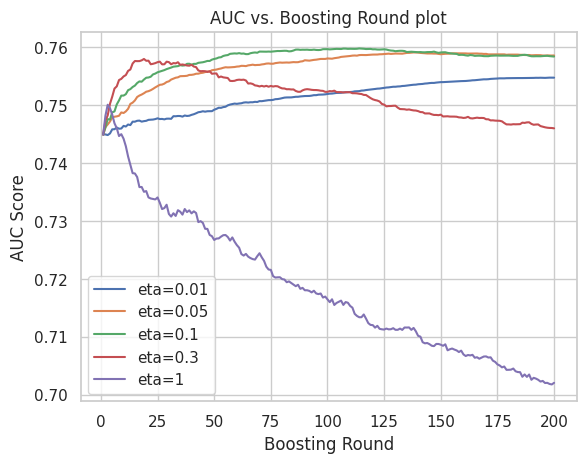

In [119]:
# plotting the scores against the bosting rounds for the different eta(s)
train_tune_xgboost_result_plot(scores_param_eta)

> From this plot we can see, eta=0.1 reaches a high AUC with lesser boosting rounds and maintains staability with very less rate of overfitting over subsequent boosting rounds


In [120]:
# so now the modified xgb_params is
xgb_params = {
      'eta': 0.1, # best eta from above step
      'max_depth': 6,
      'min_child_weight': 1,
      'scale_pos_weight': scale_pos_weight,  # Handle class imbalance of the dataset
      'objective': 'binary:logistic',
      'eval_metric': 'auc',
      'nthread': 8,
      'seed': 42,
      'verbosity': 1
  }

In [121]:
# evaluating the best max_depth
param_name = 'max_depth'
param_values = [3, 6, 8, 10, 15]
scores_param_max_depth = train_tune_xgboost(dtrain, dval,  param_name, param_values, xgb_params)

{'eta': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'scale_pos_weight': 3.9531635168447, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'nthread': 8, 'seed': 42, 'verbosity': 1}
[0]	train-auc:0.72006	val-auc:0.73052
[10]	train-auc:0.73399	val-auc:0.74380
[20]	train-auc:0.73919	val-auc:0.74823
[30]	train-auc:0.74254	val-auc:0.75112
[40]	train-auc:0.74502	val-auc:0.75287
[50]	train-auc:0.74673	val-auc:0.75376
[60]	train-auc:0.74789	val-auc:0.75458
[70]	train-auc:0.74901	val-auc:0.75499
[80]	train-auc:0.75017	val-auc:0.75543
[90]	train-auc:0.75104	val-auc:0.75571
[100]	train-auc:0.75180	val-auc:0.75593
[110]	train-auc:0.75265	val-auc:0.75603
[120]	train-auc:0.75337	val-auc:0.75611
[130]	train-auc:0.75394	val-auc:0.75626
[140]	train-auc:0.75470	val-auc:0.75654
[150]	train-auc:0.75531	val-auc:0.75663
[160]	train-auc:0.75586	val-auc:0.75673
[170]	train-auc:0.75648	val-auc:0.75695
[180]	train-auc:0.75709	val-auc:0.75698
[190]	train-auc:0.75755	val-auc:0.75690
[199]	train-auc:0.75800	va

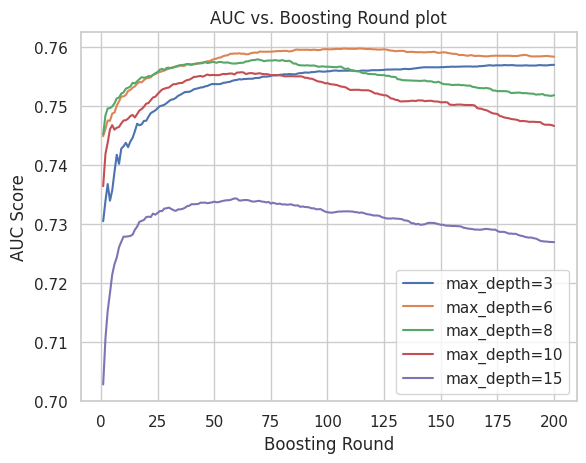

In [122]:
# plotting the scores against the bosting rounds for the different max_depth(s)
train_tune_xgboost_result_plot(scores_param_max_depth)



> We can see although max_depth = 3 is steadiliy growing, it takes longer boost roundsto to achieve higher auc. While max_depth =8 reaches higher auc faster, but it is also fast to overfit. So we can consider best max_depth = 6 which reaches higher auc scores faster and maintains stability



In [123]:
# since max_depth=6, there is no modification of the xgb_param set in the earlier step.

# # evaluating the best min_child_weight
param_name = 'min_child_weight'
param_values = [1, 5, 10, 15, 30]
scores_param_min_child_weight = train_tune_xgboost(dtrain, dval,  param_name, param_values, xgb_params)

{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'scale_pos_weight': 3.9531635168447, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'nthread': 8, 'seed': 42, 'verbosity': 1}
[0]	train-auc:0.74211	val-auc:0.74493
[10]	train-auc:0.75210	val-auc:0.75190
[20]	train-auc:0.75868	val-auc:0.75479
[30]	train-auc:0.76436	val-auc:0.75650
[40]	train-auc:0.76860	val-auc:0.75714
[50]	train-auc:0.77262	val-auc:0.75808
[60]	train-auc:0.77681	val-auc:0.75900
[70]	train-auc:0.78075	val-auc:0.75926
[80]	train-auc:0.78290	val-auc:0.75940
[90]	train-auc:0.78592	val-auc:0.75960
[100]	train-auc:0.78919	val-auc:0.75964
[110]	train-auc:0.79114	val-auc:0.75974
[120]	train-auc:0.79435	val-auc:0.75966
[130]	train-auc:0.79768	val-auc:0.75937
[140]	train-auc:0.79941	val-auc:0.75918
[150]	train-auc:0.80184	val-auc:0.75914
[160]	train-auc:0.80565	val-auc:0.75861
[170]	train-auc:0.80734	val-auc:0.75847
[180]	train-auc:0.80863	val-auc:0.75854
[190]	train-auc:0.81098	val-auc:0.75845
[199]	train-auc:0.81231	va

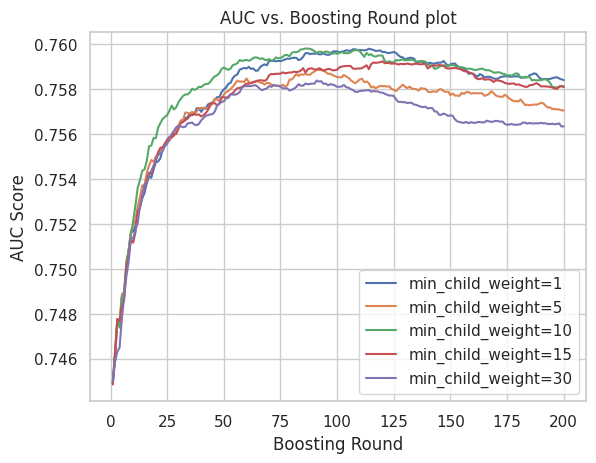

In [124]:
# plotting the scores against the bosting rounds for the different min_child_weight(s)
train_tune_xgboost_result_plot(scores_param_min_child_weight)



> So we see that even though at min_child_weight = 10 it appears to reach the higher auc (at around 80 boosting rounds), it declines and stability is a little lesser than the one with min_child_weight =1 which reached the highest auc (at around 110 boosting rounds) and appears to be more stable.

> So from this and the above plot observations we can come to a conclusion for having the num_boost_rounds = 110. We train the model now with the final parameters and num_boost_rounds



In [125]:
# since min_child_weight=1, there is no modification of the xgb_param set in the earlier step.
xgb_params_tuned = {
 'eta': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'scale_pos_weight': 3.9531635168447,
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 'nthread': 8,
 'seed': 42,
 'verbosity': 1
}

In [126]:
# training the model with tuned paramenters and updated boosting rounds
model_tuned = train(
        params=xgb_params_tuned,
        dtrain=dtrain,
        num_boost_round=110, # boost rounds as evaluated from above
        evals=[(dtrain, 'train_tune'), (dval, 'val_tuned')],  # This captures the train and val results
        verbose_eval=10
    )

[0]	train_tune-auc:0.74211	val_tuned-auc:0.74493
[10]	train_tune-auc:0.75210	val_tuned-auc:0.75190
[20]	train_tune-auc:0.75868	val_tuned-auc:0.75479
[30]	train_tune-auc:0.76436	val_tuned-auc:0.75650
[40]	train_tune-auc:0.76860	val_tuned-auc:0.75714
[50]	train_tune-auc:0.77262	val_tuned-auc:0.75808
[60]	train_tune-auc:0.77681	val_tuned-auc:0.75900
[70]	train_tune-auc:0.78075	val_tuned-auc:0.75926
[80]	train_tune-auc:0.78290	val_tuned-auc:0.75940
[90]	train_tune-auc:0.78592	val_tuned-auc:0.75960
[100]	train_tune-auc:0.78919	val_tuned-auc:0.75964
[109]	train_tune-auc:0.79111	val_tuned-auc:0.75975




> **Final Model Selection**: Evaluating on the **unseen (till now) test data** and selecting the final model from the 4 classifiers we tried. Also, we are extracting and plotting the feature importances of the final models



In [127]:
# function for Evaluation and Visualisation of the input Feature Inportances

def get_feature_importance(feature_imp):

  # Visualizing the plot with adjustments
  fig, ax = plt.subplots(figsize=(15, 8))  # Increased figure size for more space

  # Extract feature importance from the trained logistic regression model
  #importance_log = model_lr_final.coef_[0]
  importance_log = feature_imp

  # Sort the features based on their importance (descending)
  sorted_indices = importance_log.argsort()[::-1]
  sorted_importance = importance_log[sorted_indices]
  sorted_features = df_full_train.columns[sorted_indices]

  # Plot feature importance
  bars = ax.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features)

  # Add score labels at the top of each bar with adjusted position
  for bar, score in zip(bars, sorted_importance):
      height = bar.get_height()
      # Add the score above the bar with adjusted vertical offset
      ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{score:.3f}', ha='center', va='bottom', fontsize=9)

  # Rotate the x-axis labels for better visibility
  plt.xticks(rotation=90)

  # Adjust the y-ticks for better visibility
  ax.set_yticks([i * 0.1 for i in range(int(min(sorted_importance) * 10), int(max(sorted_importance) * 10) + 1)])

  plt.show()



> Logistic Regression



In [128]:
# train the parameter tuned model on the full train dataset
model_lr_final = LogisticRegression(solver= 'saga', max_iter=1000, C = 0.001, random_state=42,  class_weight='balanced')
model_lr_final.fit(df_full_train, y_full_train)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='saga')

In [129]:
# getting the evaluation metrics
y_pred_proba_lr = model_lr_final.predict_proba(df_test)[:, 1]
y_pred_lr_final = model_lr_final.predict(df_test)
auc_lr_final = roc_auc_score(y_test, y_pred_proba_lr)
report_lr_final = classification_report(y_test, y_pred_lr_final)
print(f"AUC Score for Logistic Regression: {auc_lr_final}")
print(report_lr_final)

AUC Score for Logistic Regression: 0.6823579658501058
              precision    recall  f1-score   support

           0       0.87      0.68      0.76     17642
           1       0.32      0.59      0.41      4462

    accuracy                           0.66     22104
   macro avg       0.59      0.64      0.59     22104
weighted avg       0.76      0.66      0.69     22104



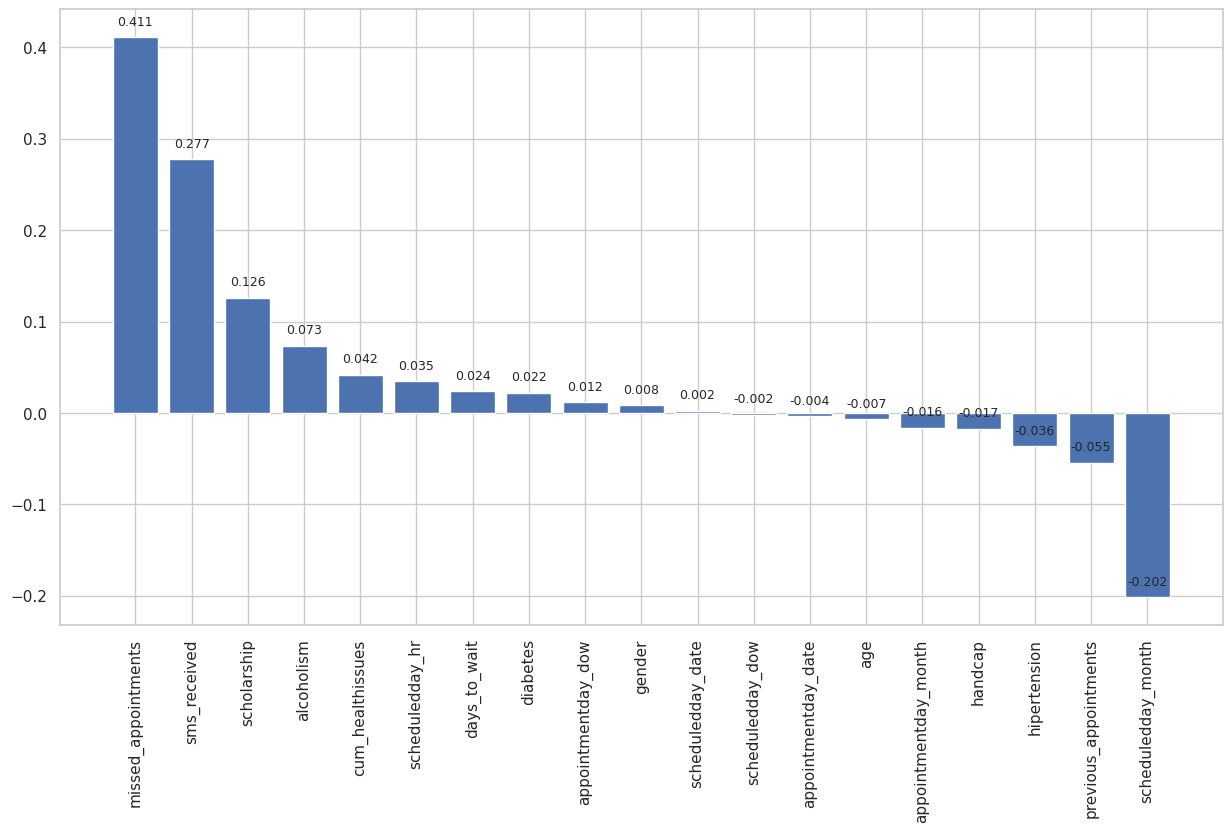

In [130]:
# getting and plotting feature importances
get_feature_importance(model_lr_final.coef_[0])



> Decision Tree



In [131]:
# train the parameter tuned model on the full train dataset
model_dt_final = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=50, class_weight='balanced')
model_dt_final.fit(df_full_train, y_full_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=50, random_state=42)

In [132]:
# getting the evaluation metrics
y_pred_proba_dt = model_dt_final.predict_proba(df_test)[:, 1]
y_pred_dt_final = model_dt_final.predict(df_test)
auc_dt_final = roc_auc_score(y_test, y_pred_proba_dt)
report_dt_final = classification_report(y_test, y_pred_dt_final)
print(f"AUC Score for Decision Tree: {auc_dt_final}")
print(report_dt_final)

AUC Score for Decision Tree: 0.734439288328843
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     17642
           1       0.31      0.78      0.45      4462

    accuracy                           0.61     22104
   macro avg       0.61      0.67      0.57     22104
weighted avg       0.79      0.61      0.65     22104



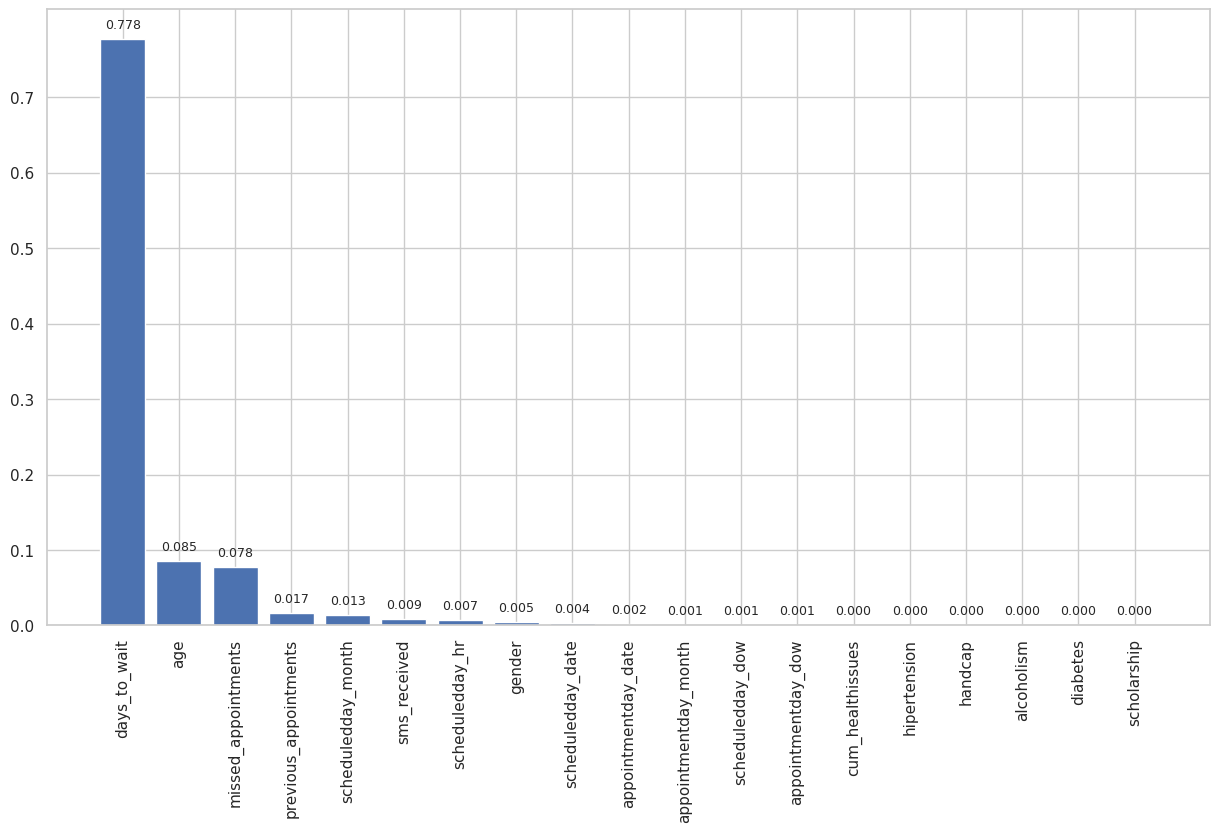

In [133]:
# getting and plotting feature importances
get_feature_importance(model_dt_final.feature_importances_)



> Random Forest



In [134]:
# train the parameter tuned model on the full train dataset
model_rf_final = RandomForestClassifier(n_estimators=200,
                                    max_depth=10,
                                    min_samples_leaf=3,
                                    random_state=42,
                                    n_jobs = -1, class_weight='balanced')
model_rf_final.fit(df_full_train, y_full_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [135]:
# getting the evaluation metrics
y_pred_proba_rf = model_rf_final.predict_proba(df_test)[:, 1]
y_pred_rf_final = model_rf_final.predict(df_test)
auc_rf_final = roc_auc_score(y_test, y_pred_proba_rf)
report_rf_final = classification_report(y_test, y_pred_rf_final)
print(f"AUC Score for Random Forest: {auc_rf_final}")
print(report_rf_final)

AUC Score for Random Forest: 0.7410055823652564
              precision    recall  f1-score   support

           0       0.92      0.55      0.69     17642
           1       0.31      0.81      0.45      4462

    accuracy                           0.60     22104
   macro avg       0.62      0.68      0.57     22104
weighted avg       0.80      0.60      0.64     22104



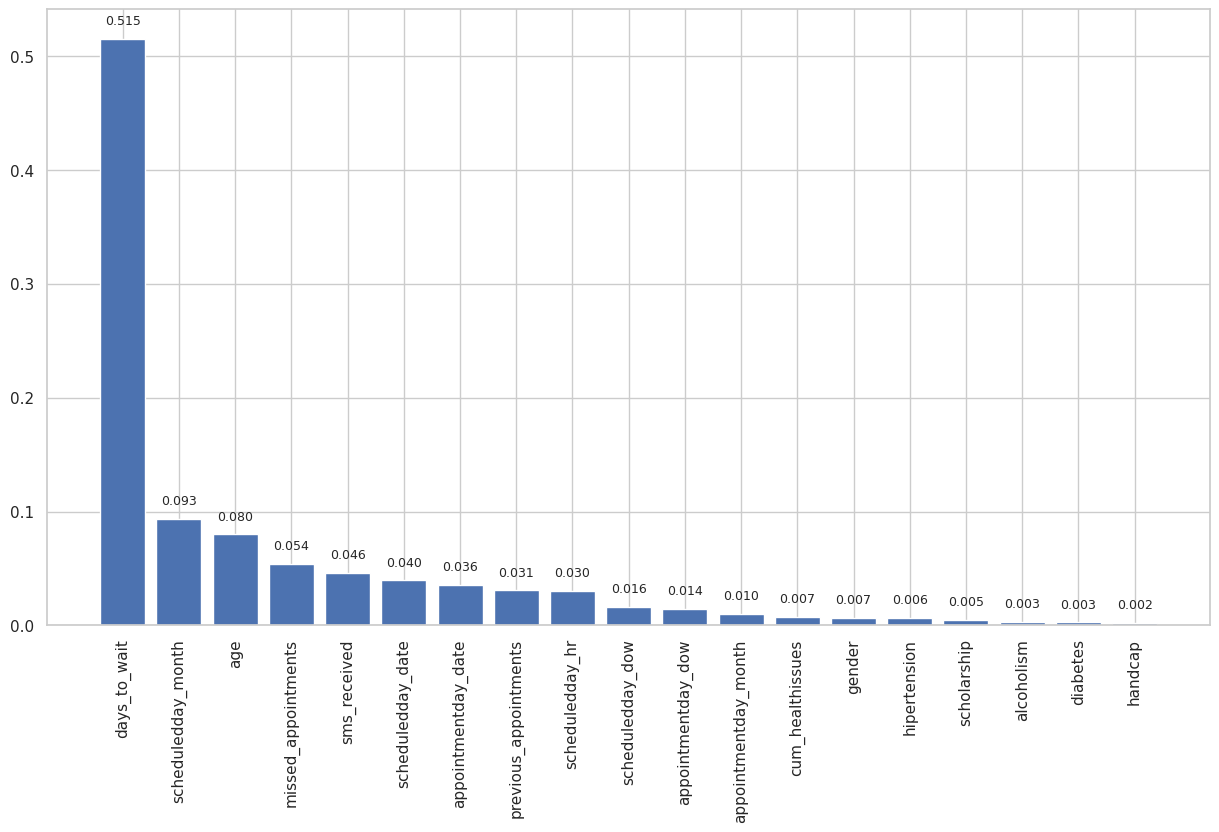

In [136]:
# getting and plotting feature importances
get_feature_importance(model_rf_final.feature_importances_)



>  XGBoost






In [137]:
# Convert the full train and test dataset to DMatrix
dtrain_final = xgb.DMatrix(df_full_train, label=y_full_train)
dtest_final = xgb.DMatrix(df_test, label=y_test)

In [138]:
# setting the xgb_params with tuned parameters from earlier
xgb_params_final = {
 'eta': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'scale_pos_weight': 3.9531635168447,
 'objective': 'binary:logistic',
 'eval_metric': 'auc',
 'nthread': 8,
 'seed': 42,
 'verbosity': 1
}

In [139]:
# Train the model on the full train dataset
model_final = xgb.train(
    params=xgb_params_final,
    dtrain=dtrain_final,
    num_boost_round=110, # as decided earlier
    evals=[(dtrain_final, 'train_final'), (dtest_final, 'test')], # Use the tuned number of boosting rounds
    verbose_eval=10
)

[0]	train_final-auc:0.74371	test-auc:0.73355
[10]	train_final-auc:0.75227	test-auc:0.73768
[20]	train_final-auc:0.75881	test-auc:0.74206
[30]	train_final-auc:0.76338	test-auc:0.74456
[40]	train_final-auc:0.76697	test-auc:0.74602
[50]	train_final-auc:0.77085	test-auc:0.74692
[60]	train_final-auc:0.77391	test-auc:0.74757
[70]	train_final-auc:0.77741	test-auc:0.74818
[80]	train_final-auc:0.77988	test-auc:0.74826
[90]	train_final-auc:0.78252	test-auc:0.74847
[100]	train_final-auc:0.78455	test-auc:0.74834
[109]	train_final-auc:0.78750	test-auc:0.74867


In [140]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Predict probabilities for the test set
y_pred_proba = model_final.predict(dtest_final)

# Convert probabilities to binary predictions (default threshold: 0.5)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision_0 = precision_score(y_test, y_pred, pos_label=0)  # Precision for class 0
precision_1 = precision_score(y_test, y_pred, pos_label=1)  # Precision for class 1
recall_0 = recall_score(y_test, y_pred, pos_label=0)        # Recall for class 0
recall_1 = recall_score(y_test, y_pred, pos_label=1)        # Recall for class 1
f1_0 = f1_score(y_test, y_pred, pos_label=0)                # F1-score for class 0
f1_1 = f1_score(y_test, y_pred, pos_label=1)                # F1-score for class 1
auc = roc_auc_score(y_test, y_pred_proba)

# Calculate weighted average F1-score
weighted_avg_f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Class 0): {precision_0:.4f}, Precision (Class 1): {precision_1:.4f}")
print(f"Recall (Class 0): {recall_0:.4f}, Recall (Class 1): {recall_1:.4f}")
print(f"F1-Score (Class 0): {f1_0:.4f}, F1-Score (Class 1): {f1_1:.4f}")
print(f"AUC: {auc:.4f}")


# Create a dictionary to hold the results
metrics_dict = {
    'AUC': [auc],
    'Precision_0': [precision_0],
    'Recall_0': [recall_0],
    'F1_Score_0': [f1_0],
    'Precision_1': [precision_1],
    'Recall_1': [recall_1],
    'F1_Score_1': [f1_1],
    'Weighted_Avg_F1': [weighted_avg_f1],
    'Accuracy': [accuracy]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Display the DataFrame
metrics_df

Accuracy: 0.6141
Precision (Class 0): 0.9185, Precision (Class 1): 0.3187
Recall (Class 0): 0.5668, Recall (Class 1): 0.8012
F1-Score (Class 0): 0.7010, F1-Score (Class 1): 0.4560
AUC: 0.7487


,AUC,Precision_0,Recall_0,F1_Score_0,Precision_1,Recall_1,F1_Score_1,Weighted_Avg_F1,Accuracy
0,0.748671,0.918527,0.566829,0.701041,0.318713,0.80121,0.456024,0.651581,0.614142


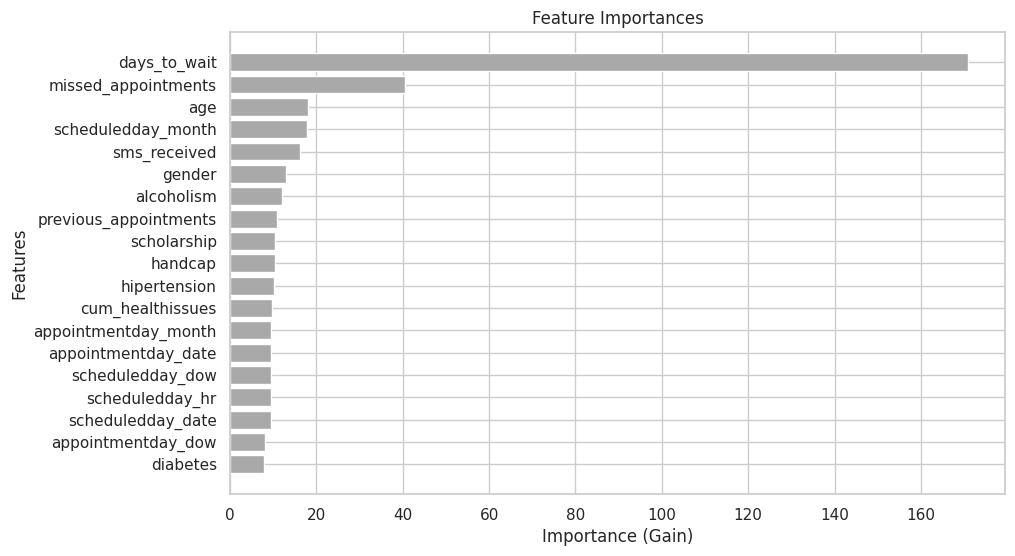

In [141]:
# Extract and visualize the featuer importances of the XGBoost model

# Get feature importance using the 'gain' metric
importance_dict = model_tuned.get_score(importance_type="gain")

# Sort the importance dictionary by values
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Separate feature names and their importance
features, importances = zip(*sorted_importance)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='darkgrey')
plt.xlabel("Importance (Gain)")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature on top
plt.show()



> ***As this model is for No-show prediction, we need to consider the Precision, Recall and F1_Score of the positive class (1) rather than the accuracy. We observe that the Precision, Recall and F1_Score of the positive class is better for the Random Forest and XGBoost model than the other two. Further, we select the XGBoost model as it has better AUC score than the Random Forest one. Also, the XBoost model have a slightly higher accuracy than the Random Forest one.***



In [142]:
# checking the various libraries' versions above to be pinned in Pipfile for creating the required environment to properly run this notebook
!pip list | grep -E 'pandas|numpy|scikit-learn|matplotlib|seaborn|xgboost'

geopandas                          1.0.1
matplotlib                         3.8.0
matplotlib-inline                  0.1.7
matplotlib-venn                    1.1.1
numpy                              1.26.4
pandas                             2.2.2
pandas-datareader                  0.10.0
pandas-gbq                         0.24.0
pandas-stubs                       2.2.2.240909
scikit-learn                       1.5.2
seaborn                            0.13.2
sklearn-pandas                     2.2.0
xgboost                            2.1.2
